In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Datos del experimento
VELS = np.array([-160.73351002765818, -176.86564838425952, -183.4926000666262, -131.2036877224365,
-207.54046614278954, -143.23683333162836, -162.77786764764684, -182.98180903077431,
-203.94037055722, -145.89100814190485, -166.03203286278588, -140.1632390815804,
-125.3748488649032, -229.26084773499818, -167.62104980559303, -168.02123736713096,
-155.65317320289603, -131.00310355534464, -195.5010297486767, -104.28081886257297,
-151.337641928422, -135.19725705026858, -156.56487504937527, -138.19988398153288,
-157.21707259514778, -160.54647604121803, -138.61343244831843, -151.51562368918954,
-168.9267442118698, -201.42598550360938, -172.8948103563856, -105.1646030165935,
-119.60703065174279, -162.23520323757958, -151.85140198582002, -102.53251063141506,
-141.58934859364268, -132.52494258052008, -151.62121492757782, -110.09633507422546,
-125.8526412033679, -135.1535923030036, -142.46562752648356, -149.96025638871467,
-110.02592662494423, -157.58062627481553, -139.1703732386234, -123.90803554056905,
-108.48110600040216, -105.6744889878915, -114.59546575707424, -120.36063877250815,
-114.16366224380569, -102.69037314928556, -125.79574721178314, -125.35860865211355,
-118.77796814143753, -130.68350652130198, -103.63663919183442, -102.59942740813615,
-179.36326341815953, -141.33795634007157, -129.51634826426474, -95.40798841547573,
-97.86633870997237, -133.18369670895612, -150.23362888872438, -159.7860322361672,
-136.85753697785822, -133.61086606259008, -118.29619942840196, -113.12544230895085,
-129.4635995641585, -108.95003494513631, -111.46053363563628, -101.26771397270575,
-123.68745446860282, -132.10551548403174, -104.78155083302039, -147.64227751929954,
-112.58715673452468, -111.04060433871976, -93.39456404357958, -123.49942092467403,
-114.96374953764058, -86.70115718049925, -97.37565513491543, -102.84267622547877,
-101.60271000013682, -112.57912473862356, -104.78603587310579, -94.87548093750134,
-95.25109492276785, -114.92905479154456, -101.21268638996258, -100.34670941892252,
-112.04274410116332])

radios = (1/780)*np.array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375,
380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455,
460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695,
700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780])
vr = VELS *(1/np.min(VELS)) # Escalar las velocidades

# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios, dtype=torch.float32).view(-1, 1)
vr_t = torch.tensor(vr, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([1.]), requires_grad = True)
        #self.C = torch.nn.Parameter(data = torch.tensor([1.]), requires_grad = True)
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.sigmoid(hidden(h))  # Cambiar a tanh para suavidad
        output = self.layers[-1](h)
        return output

mlp = MLP([1, 32, 32, 32, 1])

In [ ]:
len(VELS), len(radios)

(97, 97)

In [ ]:
import numpy as np

# Definimos el array de NumPy
mi_array_np = np.array([10, 20, 30, 40, 50])

# Elemento que buscamos
elemento_a_buscar = 30

# Encontramos la posición del elemento
indices = np.where(mi_array_np == elemento_a_buscar)

if indices[0].size > 0:
    print(f"El elemento {elemento_a_buscar} se encuentra en la posición {indices[0][0]}.")
else:
    print(f"El elemento {elemento_a_buscar} no se encuentra en el array.")


In [ ]:
np.min(VELS)

-229.26084773499818

In [ ]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

0 0.008771578781306744 2.9961796826682985e-05 Training Loss: 0.008801540359854698
100 0.009260176680982113 9.364070137962699e-05 Training Loss: 0.0093538174405694
200 0.008960920386016369 5.2749244787264615e-05 Training Loss: 0.009013669565320015
300 0.008836047723889351 3.959964305977337e-05 Training Loss: 0.008875647559762001
400 0.008793672546744347 3.729368472704664e-05 Training Loss: 0.008830966427922249
500 0.008781199343502522 3.377437315066345e-05 Training Loss: 0.008814973756670952
600 0.008777265436947346 2.9576054657809436e-05 Training Loss: 0.00880684144794941
700 0.008775775320827961 2.6078778319060802e-05 Training Loss: 0.008801854215562344
800 0.008775096386671066 2.3546239390270784e-05 Training Loss: 0.00879864301532507
900 0.00877474807202816 2.179088733100798e-05 Training Loss: 0.008796539157629013
1000 0.00877455435693264 2.055924414889887e-05 Training Loss: 0.008795113302767277
1100 0.00877444539219141 1.9652343326015398e-05 Training Loss: 0.008794098161160946
1200 

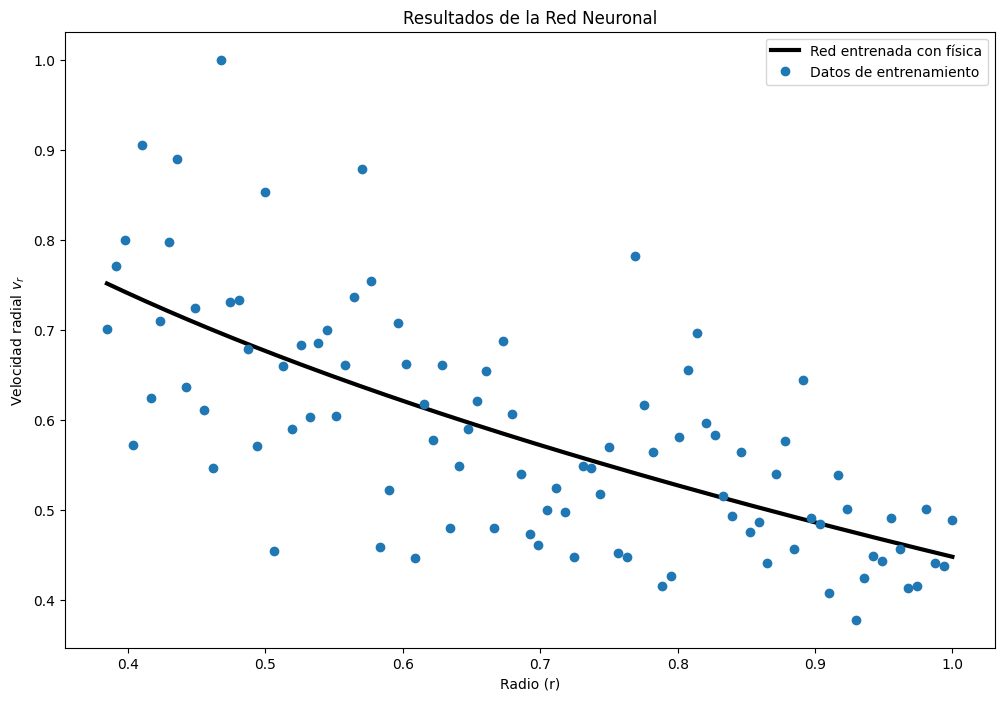

In [ ]:
radios_phys = np.linspace(radios.min(), radios.max(), 5000)
radios_phys_t = torch.tensor(radios_phys, dtype=torch.float32, requires_grad=True).view(-1, 1)

iterations = 2000
l = 0.1# Aumentar lambda para suavidad

for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones
    yh = mlp(radios_t)
    loss1 = torch.mean((yh - vr_t) ** 2)  # Pérdida de datos

    yhp = mlp(radios_phys_t)
    # Cálculo de la derivada
    du = torch.autograd.grad(yhp, radios_phys_t, torch.ones_like(yhp), create_graph=True)[0]  # dy/dx
    du2 = torch.autograd.grad(du, radios_phys_t, torch.ones_like(du), create_graph=True)[0]  # d^2y/dx^2

    yhn = mlp(radios_phys_t)
    loss3 = torch.mean((yhn - ((2 * 3e-5) / (100)) * radios_phys_t) ** 2)  # Pérdida de predicción


    # Completar con la ecuación diferencial
    physics = du - mlp.nu *(1/yhp)*(1/radios_phys_t)*(du + radios_phys_t*du2)  # Igualar la ecuación a cero
    loss2 = l * torch.mean(physics ** 2)  # Error cuadrático medio para la física

    loss = loss1 + loss2  # Pérdida total
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(epoch, loss1.item(), loss2.item(), "Training Loss:", loss.item())

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    #print(f"Valor estimado de C: {mlp.C.item()}")
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    rad = radios_phys_t.numpy()
    y_red = yhp.numpy()
    yh_tdata = yh.numpy()

    plt.figure(figsize=(12, 8))
    plt.plot(rad, y_red, 'k-', label='Red entrenada con física', linewidth=3)
    plt.plot(radios, vr, 'o', label='Datos de entrenamiento')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad radial $v_r$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()

In [ ]:
268000*6.2e-5


16.616

In [ ]:
0.008742 * 1.5

0.013113

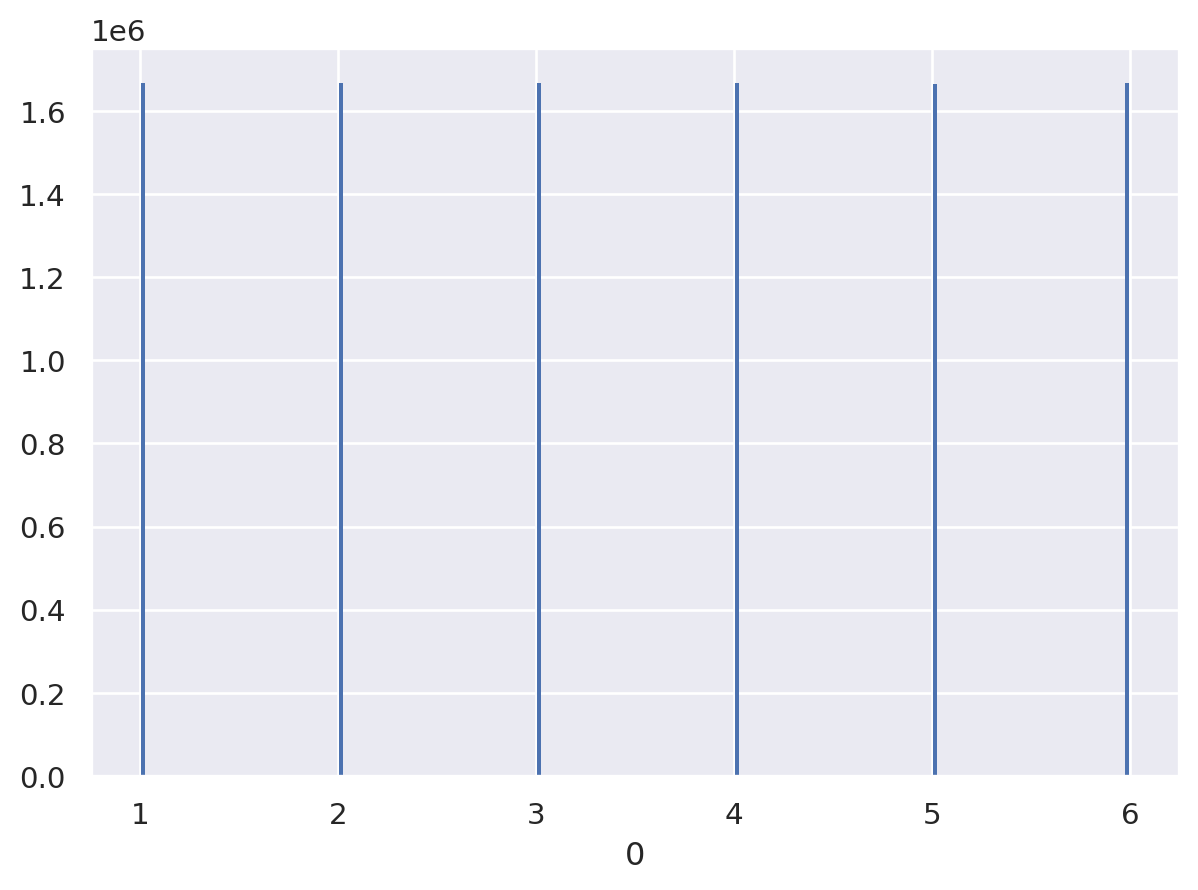

In [ ]:
import numpy as np
from seaborn import objects as so
import pandas as pd
rng = np.random.default_rng()
tiradas = pd.DataFrame(rng.integers(1,7,size = 10000000))
(
    so.Plot(data = tiradas, x = 0)
    .add(so.Bar(), so.Hist())
)

In [ ]:
tiradas

,0
0,2
1,3
2,5
3,3
4,3
...,...
995,1
996,1
997,4
998,5


TANGENCIAL

TANGENCIAL

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Datos del experimento
TVELS = np.array([630.1216543642784, 860.9362219834856, 565.5460979611845, 1007.0589389438265, 738.4472355101198, 742.2539865867836, 896.1816167580935, 811.1978833878396, 783.6354400434568, 1052.4294966165698, 1009.2009811753622, 1025.8637187377155, 1010.7408595593661, 1018.780156115248, 1051.787785858392, 1129.1249333791077, 1381.5788934662428, 1081.5868843365881, 1483.4834423665436, 1498.4408574573001, 1719.8259858498554, 1503.224236447944, 1621.0840589624786, 1616.5159429854768, 1840.1931536410143, 1851.064445127872, 1839.0728870706469, 1634.8558786550363, 1688.0635454847575, 1664.9426908634127, 1889.8530464254793, 1874.4597541371963, 1800.2860632226627, 1804.5617091271238, 1722.7813414674506, 1572.7102838015678, 1738.089992261383, 1656.7873218914365, 1709.171027124684, 1727.1020030438854, 1605.9215669327964, 1682.0540336443403, 1591.4728944982376, 1496.8345678903445, 1549.7849898193856, 1476.7938912999323, 1440.0338560078449, 1487.347084630033, 1357.9321238229506, 1320.543560143046, 1376.5136019414608, 1330.4027373122904, 1383.5639621729122, 1354.4287353655486, 1354.4287353655486, 1288.3591112160102, 1359.5612029767826, 1301.7701591262924, 1271.4106256460059, 1249.34745712869, 1264.0741526310755, 1261.9960482642025, 1226.356145604258, 1196.891957828173, 1153.361845985948, 1142.3491159591017, 1157.8418409887138, 1148.3924510876734, 1147.579118778793, 1091.991771142622, 1115.4168340763447, 1100.607890051658, 1086.0513493161006, 1075.3699280659034, 1023.9109184044421, 1056.2163289907191, 1023.3390729524866, 1027.0375102655737, 1009.3673372959955, 962.123731695744, 970.3816673019655, 968.9137692493799, 929.0489425561822, 953.8938565892319, 947.4316852017685, 946.8001566615671, 941.2393623273842, 945.781407555651, 931.0265921525205, 935.7355863062602, 902.28793272351, 897.5003526969713, 881.4276241122085, 852.4712596344967, 843.7369452300744, 864.0057491650085, 854.0726086366512, 830.9174041663857, 829.9921805469652, 829.4117102763585, 802.1223717225246, 836.9115445080895, 797.869869185419, 817.2148325451838, 808.1560860110772, 808.1560860110772, 789.1632475065262, 797.8956330373726, 767.0672581657439, 771.2375890977444, 757.0753723056487, 745.868334533519, 745.868334533519, 751.7690215828686, 750.3229508806745, 748.1863963462565, 750.3307104609352, 738.957397557421, 729.6565417584213, 729.9309164307355, 704.8952313043269, 715.3204898675575, 696.2675992446948, 686.2393548075413, 673.4364334962544, 674.2438378557573, 676.5929655159998, 667.088203775376, 675.2202225902827, 641.0896781588339, 649.8605531599604, 650.9658018979902, 638.4014511469359, 638.9907205691078, 642.8738198181424, 617.1880468826912, 619.1243535038276, 608.4269683765434, 613.0712527269109, 622.9412252446302, 608.7894363371355, 598.9379753072034, 598.9379753072034, 600.785465054654, 596.4581039991596, 580.4464187333947, 552.0690588343261, 557.4654711083018, 559.3251557943821, 548.9590973237665, 524.0573450395754, 535.5548320702272])

radios = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785])
vt = TVELS #* (-1)  # Escalar las velocidades

# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios, dtype=torch.float32).view(-1, 1)
vt_t = torch.tensor(vt, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([1.]), requires_grad = True)
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.relu(hidden(h))  # Cambiar a tanh para suavidad
        output = self.layers[-1](h)
        return output

mlp = MLP([1, 32, 32, 32, 1])

In [ ]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
radios_phys = np.linspace(radios.min(), radios.max(), 1000)
radios_phys_t = torch.tensor(radios_phys, dtype=torch.float32, requires_grad=True).view(-1, 1)

iterations = 10000
l = 0# Aumentar lambda para suavidad

for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones
    yh = mlp(radios_t)
    loss1 = torch.mean((yh - vt_t) ** 2)  # Pérdida de datos

    yhp = mlp(radios_phys_t)
    # Cálculo de la derivada
    du_theta = torch.autograd.grad(yhp, radios_phys_t, torch.ones_like(yhp), create_graph=True)[0]  # dy/dx
    du2_theta = torch.autograd.grad(du_theta, radios_phys_t, torch.ones_like(du_theta), create_graph=True)[0]  # d^2y/dx^2

    yhn = mlp(radios_phys_t)
    loss3 = torch.mean((yhn - ((2 * 3e-5) / (100)) * radios_phys_t) ** 2)  # Pérdida de predicción


    # Completar con la ecuación diferencial
    physics = du_theta - mlp.nu * (1/yhp) * (1/radios_phys_t) * (du_theta + radios_phys_t * du2_theta) # Igualar la ecuación a cero
    loss2 = l * torch.mean(physics ** 2)  # Error cuadrático medio para la física

    loss = loss1 + loss2  # Pérdida total
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(epoch, loss1.item(), loss2.item(), "Training Loss:", loss.item())

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    #print(f"Valor estimado de C: {mlp.C.item()}")
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    rad = radios_phys_t.numpy()
    y_red = yhp.numpy()
    yh_tdata = yh.numpy()

    plt.figure(figsize=(12, 8))
    plt.plot(rad, y_red, 'k-', label='Red entrenada con física', linewidth=3)
    plt.plot(radios, vr, 'o', label='Datos de entrenamiento')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad radial $v_r$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()

0 1208415.875 0.0 Training Loss: 1208415.875
100 1153666.0 0.0 Training Loss: 1153666.0
200 1061623.0 0.0 Training Loss: 1061623.0
300 914602.3125 0.0 Training Loss: 914602.3125
400 746422.9375 0.0 Training Loss: 746422.9375
500 632425.5625 0.0 Training Loss: 632425.5625
600 597267.5 0.0 Training Loss: 597267.5
700 593254.9375 0.0 Training Loss: 593254.9375
800 593029.5 0.0 Training Loss: 593029.5
900 592975.375 0.0 Training Loss: 592975.375
1000 592924.5 0.0 Training Loss: 592924.5
1100 592873.1875 0.0 Training Loss: 592873.1875
1200 592821.4375 0.0 Training Loss: 592821.4375
1300 592769.1875 0.0 Training Loss: 592769.1875
1400 592716.375 0.0 Training Loss: 592716.375
1500 592663.125 0.0 Training Loss: 592663.125
1600 592609.375 0.0 Training Loss: 592609.375
1700 592555.3125 0.0 Training Loss: 592555.3125
1800 592500.625 0.0 Training Loss: 592500.625
1900 592445.625 0.0 Training Loss: 592445.625
2000 592390.1875 0.0 Training Loss: 592390.1875
2100 592334.1875 0.0 Training Loss: 592334

KeyboardInterrupt: 

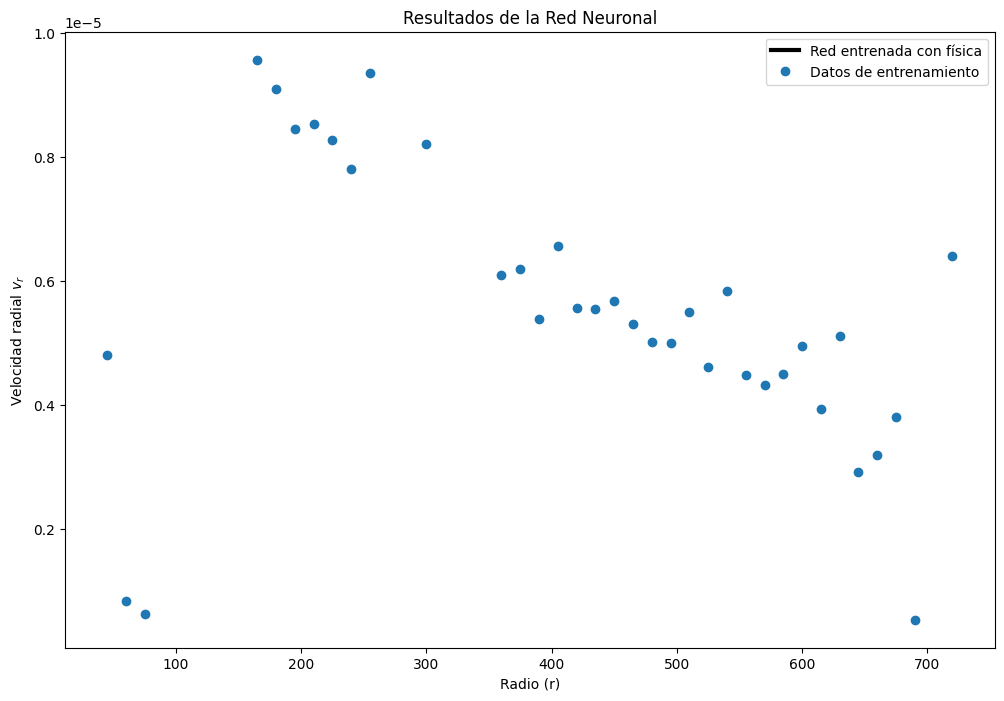

In [ ]:
with torch.no_grad():
    rad = radios_phys_t.numpy()
    y_red = yhp.numpy()
    yh_tdata = yh.numpy()

    plt.figure(figsize=(12, 8))
    plt.plot(rad, y_red, 'k-', label='Red entrenada con física', linewidth=3)
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad radial $v_r$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()

In [ ]:
# Lista de cadenas
data = [
    "745: 600.785465054654", "695: 638.4014511469359", "650: 686.2393548075413",
    "770: 559.3251557943821", "730: 622.9412252446302", "690: 650.9658018979902",
    "665: 676.5929655159998", "615: 750.3307104609352", "685: 649.8605531599604",
    "585: 771.2375890977444", "705: 642.8738198181424", "715: 619.1243535038276",
    "600: 751.7690215828686", "620: 738.957397557421", "670: 667.088203775376",
    "575: 797.8956330373726", "450: 968.9137692493799", "570: 789.1632475065262",
    "415: 1023.9109184044421", "510: 852.4712596344967", "395: 1115.4168340763447",
    "470: 946.8001566615671", "400: 1100.607890051658", "805: 1288.414042289463",
    "610: 748.1863963462565", "435: 1009.3673372959955", "635: 704.8952313043269",
    "580: 767.0672581657439", "385: 1147.579118778793", "530: 830.9174041663857",
    "425: 1023.3390729524866", "235: 1656.7873218914365", "680: 641.0896781588339",
    "725: 613.0712527269109", "495: 902.28793272351", "255: 1682.0540336443403",
    "375: 1157.8418409887138", "765: 557.4654711083018", "180: 1889.8530464254793",
    "155: 1851.064445127872", "525: 854.0726086366512", "455: 929.0489425561822",
    "420: 1056.2163289907191", "390: 1091.991771142622", "490: 935.7355863062602",
    "460: 953.8938565892319", "520: 864.0057491650085", "145: 1616.5159429854768",
    "75: 1052.4294966165698", "655: 673.4364334962544", "245: 1727.1020030438854",
    "80: 1009.2009811753622", "630: 729.9309164307355", "20: 356.02065063677276",
    "380: 1148.3924510876734", "440: 962.123731695744", "35: 860.9362219834856",
    "545: 802.1223717225246", "320: 1288.3591112160102", "550: 836.9115445080895",
    "720: 608.4269683765434", "780: 524.0573450395754", "45: 1007.0589389438265",
    "120: 1483.4834423665436", "100: 1051.787785858392", "295: 1320.543560143046",
    "500: 897.5003526969713", "555: 797.869869185419", "465: 947.4316852017685",
    "335: 1271.4106256460059", "140: 1621.0840589624786", "135: 1503.224236447944",
    "645: 696.2675992446948", "270: 1549.7849898193856", "365: 1153.361845985948",
    "300: 1376.5136019414608", "275: 1476.7938912999323", "540: 829.4117102763585",
    "625: 729.6565417584213", "560: 817.2148325451838", "590: 757.0753723056487",
    "280: 1440.0338560078449", "735: 608.7894363371355", "430: 1027.0375102655737",
    "640: 715.3204898675575", "515: 843.7369452300744", "340: 1249.34745712869",
    "350: 1261.9960482642025", "370: 1142.3491159591017", "405: 1086.0513493161006",
    "355: 1226.356145604258", "475: 941.2393623273842", "675: 675.2202225902827",
    "480: 945.781407555651", "605: 750.3229508806745", "565: 808.1560860110772",
    "785: 535.5548320702272", "505: 881.4276241122085", "660: 674.2438378557573",
    "485: 931.0265921525205", "595: 745.868334533519", "740: 598.9379753072034",
    "700: 638.9907205691078", "800: 559.6675620691104", "760: 552.0690588343261",
    "755: 580.4464187333947", "710: 617.1880468826912", "775: 548.9590973237665",
    "790: 530.2432561768505", "750: 596.4581039991596", "795: 535.1584774504896",
    "40: 565.5460979611845", "70: 783.6354400434568", "315: 1354.4287353655486",
    "15: 639.8069553998541", "535: 829.9921805469652", "55: 742.2539865867836",
    "90: 1010.7408595593661", "105: 1129.1249333791077", "305: 1330.4027373122904",
    "360: 1196.891957828173", "325: 1359.5612029767826", "410: 1075.3699280659034",
    "250: 1605.9215669327964", "150: 1840.1931536410143", "175: 1664.9426908634127",
    "60: 896.1816167580935", "170: 1688.0635454847575", "310: 1383.5639621729122",
    "330: 1301.7701591262924", "160: 1839.0728870706469", "260: 1591.4728944982376",
    "85: 1025.8637187377155", "115: 1081.5868843365881", "185: 1874.4597541371963",
    "290: 1357.9321238229506", "165: 1634.8558786550363", "345: 1264.0741526310755",
    "445: 970.3816673019655", "110: 1381.5788934662428", "205: 1572.7102838015678",
    "25: 617.5080501457218", "95: 1018.780156115248", "285: 1487.347084630033",
    "265: 1496.8345678903445", "130: 1719.8259858498554", "195: 1804.5617091271238",
    "50: 738.4472355101198", "190: 1800.2860632226627", "30: 630.1216543642784",
    "200: 1722.7813414674506", "125: 1498.4408574573001", "65: 811.1978833878396",
    "240: 1709.171027124684", "210: 1738.089992261383", "315: 1354.4287353655486",
    "565: 808.1560860110772", "595: 745.868334533519", "740: 598.9379753072034"
]

# Ordenar la lista según el número antes de los dos puntos
sorted_data = sorted(data, key=lambda x: int(x.split(':')[0]))

# Imprimir la lista ordenada
for item in sorted_data:
    print(item)


15: 639.8069553998541
20: 356.02065063677276
25: 617.5080501457218
30: 630.1216543642784
35: 860.9362219834856
40: 565.5460979611845
45: 1007.0589389438265
50: 738.4472355101198
55: 742.2539865867836
60: 896.1816167580935
65: 811.1978833878396
70: 783.6354400434568
75: 1052.4294966165698
80: 1009.2009811753622
85: 1025.8637187377155
90: 1010.7408595593661
95: 1018.780156115248
100: 1051.787785858392
105: 1129.1249333791077
110: 1381.5788934662428
115: 1081.5868843365881
120: 1483.4834423665436
125: 1498.4408574573001
130: 1719.8259858498554
135: 1503.224236447944
140: 1621.0840589624786
145: 1616.5159429854768
150: 1840.1931536410143
155: 1851.064445127872
160: 1839.0728870706469
165: 1634.8558786550363
170: 1688.0635454847575
175: 1664.9426908634127
180: 1889.8530464254793
185: 1874.4597541371963
190: 1800.2860632226627
195: 1804.5617091271238
200: 1722.7813414674506
205: 1572.7102838015678
210: 1738.089992261383
235: 1656.7873218914365
240: 1709.171027124684
245: 1727.1020030438854
2

In [ ]:
# Extraer los números a la izquierda y a la derecha de los dos puntos
izquierda = [int(item.split(':')[0]) for item in sorted_data]
derecha = [float(item.split(':')[1].strip()) for item in sorted_data]

# Imprimir las listas
print("Izquierda:", izquierda)
print("Derecha:", derecha)



Izquierda: [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805]
Derecha: [639.8069553998541, 356.02065063677276, 617.5080501457218, 630.1216543642784, 860.9362219834856, 565.5460979611845, 1007.0589389438265, 738.4472355101198, 742.2539865867836, 896.1816167580935, 811.1978

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

TVELS = np.array([630.1216543642784, 860.9362219834856, 565.5460979611845, 1007.0589389438265, 738.4472355101198, 742.2539865867836, 896.1816167580935, 811.1978833878396, 783.6354400434568, 1052.4294966165698, 1009.2009811753622, 1025.8637187377155, 1010.7408595593661, 1018.780156115248, 1051.787785858392, 1129.1249333791077, 1381.5788934662428, 1081.5868843365881, 1483.4834423665436, 1498.4408574573001, 1719.8259858498554, 1503.224236447944, 1621.0840589624786, 1616.5159429854768, 1840.1931536410143, 1851.064445127872, 1839.0728870706469, 1634.8558786550363, 1688.0635454847575, 1664.9426908634127, 1889.8530464254793, 1874.4597541371963, 1800.2860632226627, 1804.5617091271238, 1722.7813414674506, 1572.7102838015678, 1738.089992261383, 1656.7873218914365, 1709.171027124684, 1727.1020030438854, 1605.9215669327964, 1682.0540336443403, 1591.4728944982376, 1496.8345678903445, 1549.7849898193856, 1476.7938912999323, 1440.0338560078449, 1487.347084630033, 1357.9321238229506, 1320.543560143046, 1376.5136019414608, 1330.4027373122904, 1383.5639621729122, 1354.4287353655486, 1354.4287353655486, 1288.3591112160102, 1359.5612029767826, 1301.7701591262924, 1271.4106256460059, 1249.34745712869, 1264.0741526310755, 1261.9960482642025, 1226.356145604258, 1196.891957828173, 1153.361845985948, 1142.3491159591017, 1157.8418409887138, 1148.3924510876734, 1147.579118778793, 1091.991771142622, 1115.4168340763447, 1100.607890051658, 1086.0513493161006, 1075.3699280659034, 1023.9109184044421, 1056.2163289907191, 1023.3390729524866, 1027.0375102655737, 1009.3673372959955, 962.123731695744, 970.3816673019655, 968.9137692493799, 929.0489425561822, 953.8938565892319, 947.4316852017685, 946.8001566615671, 941.2393623273842, 945.781407555651, 931.0265921525205, 935.7355863062602, 902.28793272351, 897.5003526969713, 881.4276241122085, 852.4712596344967, 843.7369452300744, 864.0057491650085, 854.0726086366512, 830.9174041663857, 829.9921805469652, 829.4117102763585, 802.1223717225246, 836.9115445080895, 797.869869185419, 817.2148325451838, 808.1560860110772, 808.1560860110772, 789.1632475065262, 797.8956330373726, 767.0672581657439, 771.2375890977444, 757.0753723056487, 745.868334533519, 745.868334533519, 751.7690215828686, 750.3229508806745, 748.1863963462565, 750.3307104609352, 738.957397557421, 729.6565417584213, 729.9309164307355, 704.8952313043269, 715.3204898675575, 696.2675992446948, 686.2393548075413, 673.4364334962544, 674.2438378557573, 676.5929655159998, 667.088203775376, 675.2202225902827, 641.0896781588339, 649.8605531599604, 650.9658018979902, 638.4014511469359, 638.9907205691078, 642.8738198181424, 617.1880468826912, 619.1243535038276, 608.4269683765434, 613.0712527269109, 622.9412252446302, 608.7894363371355, 598.9379753072034, 598.9379753072034, 600.785465054654, 596.4581039991596, 580.4464187333947, 552.0690588343261, 557.4654711083018, 559.3251557943821, 548.9590973237665, 524.0573450395754, 535.5548320702272])

radios = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785])
vt = TVELS

vt = TVELS / np.max(TVELS)  # Velocidades tangenciales

# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios, dtype=torch.float32, requires_grad=True).view(-1, 1)
vt_t = torch.tensor(vt, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([1.]), requires_grad=True)  # Parámetro nu
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))  # Usar tanh para suavidad
        output = self.layers[-1](h)
        return output

mlp = MLP([1, 32, 32, 32, 1])
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-5)

# Entrenamiento del modelo
iterations = 10000
lambda_phy = 0.001 # Parámetro para la física

for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones para las velocidades tangenciales
    yh = mlp(radios_t)

    # Pérdida basada en los datos
    loss_data = torch.mean((yh - vt_t) ** 2)

    # Cálculo de la derivada
    du_theta = torch.autograd.grad(yh, radios_t, torch.ones_like(yh), create_graph=True)[0]  # dy/dx
    du2_theta = torch.autograd.grad(du_theta, radios_t, torch.ones_like(du_theta), create_graph=True)[0]  # d^2y/dx^2

    # Ecuación diferencial: v_t = (nu/r) * (du_theta + r * du2_theta)
    physics = du_theta - (mlp.nu / radios_t) * (du_theta + radios_t * du2_theta)  # Igualar a cero
    loss_phy = lambda_phy * torch.mean(physics ** 2)  # Pérdida de física

    # Pérdida total
    loss = loss_data + loss_phy
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(epoch, loss_data.item(), loss_phy.item(), "Training Loss:", loss.item())

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()


0 0.19285988807678223 2.98227263197115e-13 Training Loss: 0.19285988807678223
100 0.1384287029504776 5.089226701735297e-14 Training Loss: 0.1384287029504776
200 0.10010933876037598 5.967743524825861e-14 Training Loss: 0.10010933876037598
300 0.07425852864980698 2.648636247392505e-13 Training Loss: 0.07425852864980698
400 0.05790640041232109 6.128276597121285e-13 Training Loss: 0.05790640041232109
500 0.04844309017062187 1.06115962371367e-12 Training Loss: 0.04844309017062187
600 0.04351840540766716 1.5829154393492972e-12 Training Loss: 0.04351840540766716
700 0.04124066233634949 2.1592862047004058e-12 Training Loss: 0.04124066233634949
800 0.040309060364961624 2.7688767077760357e-12 Training Loss: 0.040309060364961624
900 0.03996967524290085 3.3883635914416788e-12 Training Loss: 0.03996967524290085
1000 0.03985511139035225 4.000520401059582e-12 Training Loss: 0.03985511139035225
1100 0.03981413319706917 4.596394445610663e-12 Training Loss: 0.03981413319706917
1200 0.03979378938674927 5

KeyboardInterrupt: 

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

TVELS = np.array([630.1216543642784, 860.9362219834856, 565.5460979611845, 1007.0589389438265, 738.4472355101198, 742.2539865867836, 896.1816167580935, 811.1978833878396, 783.6354400434568, 1052.4294966165698, 1009.2009811753622, 1025.8637187377155, 1010.7408595593661, 1018.780156115248, 1051.787785858392, 1129.1249333791077, 1381.5788934662428, 1081.5868843365881, 1483.4834423665436, 1498.4408574573001, 1719.8259858498554, 1503.224236447944, 1621.0840589624786, 1616.5159429854768, 1840.1931536410143, 1851.064445127872, 1839.0728870706469, 1634.8558786550363, 1688.0635454847575, 1664.9426908634127, 1889.8530464254793, 1874.4597541371963, 1800.2860632226627, 1804.5617091271238, 1722.7813414674506, 1572.7102838015678, 1738.089992261383, 1656.7873218914365, 1709.171027124684, 1727.1020030438854, 1605.9215669327964, 1682.0540336443403, 1591.4728944982376, 1496.8345678903445, 1549.7849898193856, 1476.7938912999323, 1440.0338560078449, 1487.347084630033, 1357.9321238229506, 1320.543560143046, 1376.5136019414608, 1330.4027373122904, 1383.5639621729122, 1354.4287353655486, 1354.4287353655486, 1288.3591112160102, 1359.5612029767826, 1301.7701591262924, 1271.4106256460059, 1249.34745712869, 1264.0741526310755, 1261.9960482642025, 1226.356145604258, 1196.891957828173, 1153.361845985948, 1142.3491159591017, 1157.8418409887138, 1148.3924510876734, 1147.579118778793, 1091.991771142622, 1115.4168340763447, 1100.607890051658, 1086.0513493161006, 1075.3699280659034, 1023.9109184044421, 1056.2163289907191, 1023.3390729524866, 1027.0375102655737, 1009.3673372959955, 962.123731695744, 970.3816673019655, 968.9137692493799, 929.0489425561822, 953.8938565892319, 947.4316852017685, 946.8001566615671, 941.2393623273842, 945.781407555651, 931.0265921525205, 935.7355863062602, 902.28793272351, 897.5003526969713, 881.4276241122085, 852.4712596344967, 843.7369452300744, 864.0057491650085, 854.0726086366512, 830.9174041663857, 829.9921805469652, 829.4117102763585, 802.1223717225246, 836.9115445080895, 797.869869185419, 817.2148325451838, 808.1560860110772, 808.1560860110772, 789.1632475065262, 797.8956330373726, 767.0672581657439, 771.2375890977444, 757.0753723056487, 745.868334533519, 745.868334533519, 751.7690215828686, 750.3229508806745, 748.1863963462565, 750.3307104609352, 738.957397557421, 729.6565417584213, 729.9309164307355, 704.8952313043269, 715.3204898675575, 696.2675992446948, 686.2393548075413, 673.4364334962544, 674.2438378557573, 676.5929655159998, 667.088203775376, 675.2202225902827, 641.0896781588339, 649.8605531599604, 650.9658018979902, 638.4014511469359, 638.9907205691078, 642.8738198181424, 617.1880468826912, 619.1243535038276, 608.4269683765434, 613.0712527269109, 622.9412252446302, 608.7894363371355, 598.9379753072034, 598.9379753072034, 600.785465054654, 596.4581039991596, 580.4464187333947, 552.0690588343261, 557.4654711083018, 559.3251557943821, 548.9590973237665, 524.0573450395754, 535.5548320702272])

radios = (1/785)*np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785])
#vt = TVELS

vt = TVELS / np.max(TVELS)  # Velocidades tangenciales

# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios, dtype=torch.float32, requires_grad=True).view(-1, 1)
vt_t = torch.tensor(vt, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([0.33]), requires_grad=True)  # Parámetro nu
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))  # Usar tanh para suavidad
        output = self.layers[-1](h)
        return output

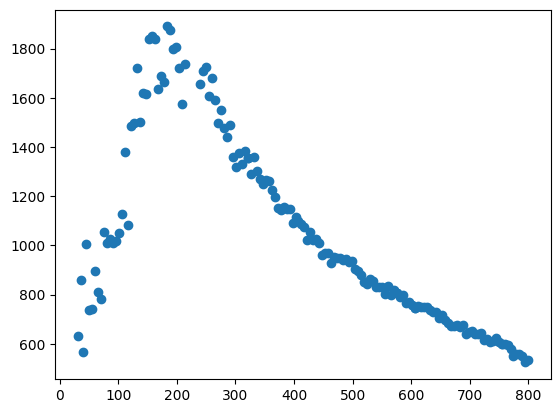

In [ ]:
plt.scatter(radios*800, TVELS)

In [ ]:
radios_physics = (1/780)*np.linspace(100, 780, 1000)
radios_physics_t = torch.tensor(radios_physics, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [ ]:
mlp = MLP([1, 32, 32, 32, 1])
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

0 0.000970395456533879 0.0002463234413880855 Training Loss: 0.001216718927025795
100 0.0009733203914947808 0.0002465102297719568 Training Loss: 0.0012198305921629071
200 0.0009690792649053037 0.0002470238832756877 Training Loss: 0.0012161030899733305
300 0.0009684195974841714 0.00024736637715250254 Training Loss: 0.001215785974636674
400 0.0009764409624040127 0.000247842981480062 Training Loss: 0.0012242839438840747
500 0.0009670793660916388 0.00024811443290673196 Training Loss: 0.0012151937698945403
600 0.0009663549135439098 0.00024851434864103794 Training Loss: 0.0012148693203926086
700 0.0009728979202918708 0.00024901668075472116 Training Loss: 0.001221914542838931
800 0.0009648775449022651 0.0002493687206879258 Training Loss: 0.0012142462655901909
900 0.000964069738984108 0.00024982457398436964 Training Loss: 0.001213894342072308
1000 0.0009863622253760695 0.0002499975962564349 Training Loss: 0.0012363598216325045
1100 0.000962349062319845 0.00025082187494263053 Training Loss: 0.00

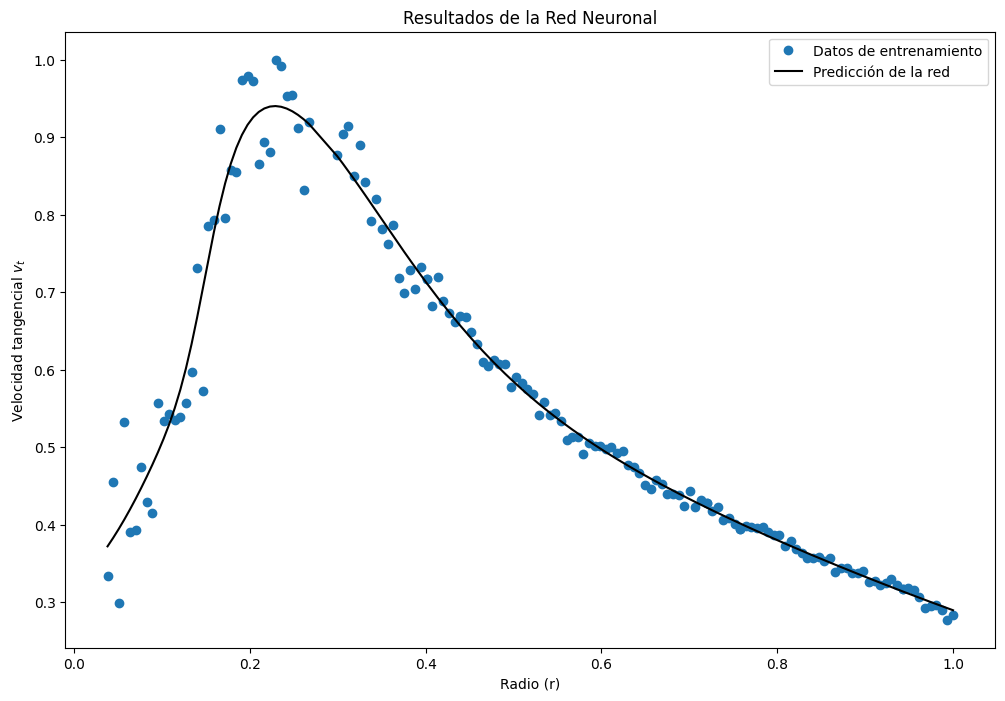

In [ ]:
# Entrenamiento del modelo
iterations = 2000
lambda_phy = 0.0001# Parámetro para la física

for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones para las velocidades tangenciales
    yh = mlp(radios_t)

    # Pérdida basada en los datos
    loss_data = torch.mean((yh - vt_t) ** 2)

    yhp = mlp(radios_physics_t)

    # Cálculo de la derivada
    du_theta = torch.autograd.grad(yhp, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # dy/dx
    du2_theta = torch.autograd.grad(du_theta, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # d^2y/dx^2

    # Ecuación diferencial: v_t = (nu/r) * (du_theta + r * du2_theta)
    physics = du_theta - (mlp.nu / radios_physics_t) * (du_theta + radios_physics_t * du2_theta)  # Igualar a cero
    loss_phy = lambda_phy * torch.mean(physics ** 2)  # Pérdida de física

    # Pérdida total
    loss = loss_data + loss_phy
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(epoch, loss_data.item(), loss_phy.item(), "Training Loss:", loss.item())

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()


l = 0 obtengo nu = 0.330

l = 0.0001 nu = 0.016

l = 0.001 nu = 0.025

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

TVELS = np.array([  1051.787785858392, 1129.1249333791077, 1381.5788934662428, 1081.5868843365881, 1483.4834423665436, 1498.4408574573001, 1719.8259858498554, 1503.224236447944, 1621.0840589624786, 1616.5159429854768, 1840.1931536410143, 1851.064445127872, 1839.0728870706469, 1634.8558786550363, 1688.0635454847575, 1664.9426908634127, 1889.8530464254793, 1874.4597541371963, 1800.2860632226627, 1804.5617091271238, 1722.7813414674506, 1572.7102838015678, 1738.089992261383, 1656.7873218914365, 1709.171027124684, 1727.1020030438854, 1605.9215669327964, 1682.0540336443403, 1591.4728944982376, 1496.8345678903445, 1549.7849898193856, 1476.7938912999323, 1440.0338560078449, 1487.347084630033, 1357.9321238229506, 1320.543560143046, 1376.5136019414608, 1330.4027373122904, 1383.5639621729122, 1354.4287353655486, 1354.4287353655486, 1288.3591112160102, 1359.5612029767826, 1301.7701591262924, 1271.4106256460059, 1249.34745712869, 1264.0741526310755, 1261.9960482642025, 1226.356145604258, 1196.891957828173, 1153.361845985948, 1142.3491159591017, 1157.8418409887138, 1148.3924510876734, 1147.579118778793, 1091.991771142622, 1115.4168340763447, 1100.607890051658, 1086.0513493161006, 1075.3699280659034, 1023.9109184044421, 1056.2163289907191, 1023.3390729524866, 1027.0375102655737, 1009.3673372959955, 962.123731695744, 970.3816673019655, 968.9137692493799, 929.0489425561822, 953.8938565892319, 947.4316852017685, 946.8001566615671, 941.2393623273842, 945.781407555651, 931.0265921525205, 935.7355863062602, 902.28793272351, 897.5003526969713, 881.4276241122085, 852.4712596344967, 843.7369452300744, 864.0057491650085, 854.0726086366512, 830.9174041663857, 829.9921805469652, 829.4117102763585, 802.1223717225246, 836.9115445080895, 797.869869185419, 817.2148325451838, 808.1560860110772, 808.1560860110772, 789.1632475065262, 797.8956330373726, 767.0672581657439, 771.2375890977444, 757.0753723056487, 745.868334533519, 745.868334533519, 751.7690215828686, 750.3229508806745, 748.1863963462565, 750.3307104609352, 738.957397557421, 729.6565417584213, 729.9309164307355, 704.8952313043269, 715.3204898675575, 696.2675992446948, 686.2393548075413, 673.4364334962544, 674.2438378557573, 676.5929655159998, 667.088203775376, 675.2202225902827, 641.0896781588339, 649.8605531599604, 650.9658018979902, 638.4014511469359, 638.9907205691078, 642.8738198181424, 617.1880468826912, 619.1243535038276, 608.4269683765434, 613.0712527269109, 622.9412252446302, 608.7894363371355, 598.9379753072034, 598.9379753072034, 600.785465054654, 596.4581039991596, 580.4464187333947, 552.0690588343261, 557.4654711083018, 559.3251557943821, 548.9590973237665, 524.0573450395754, 535.5548320702272])

radios = (1/785)*np.array([ 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785])
vt = TVELS

vt = TVELS / np.max(TVELS)  # Velocidades tangenciales


# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios, dtype=torch.float32, requires_grad=True).view(-1, 1)
vt_t = torch.tensor(vt, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([0.33]), requires_grad=True)  # Parámetro nu
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))  # Usar tanh para suavidad
        output = self.layers[-1](h)
        return output

In [ ]:
np.max(TVELS)

1889.8530464254793

In [ ]:
NU = 0.025149190798401833

new_NU = NU * 800 * 1889.853

In [ ]:
new_NU

38022.61894234568

ahora deberia pasar esto a unidades de nu metros sobre segundo por distancia, deberia pasar de pixel a metro

bueno ahora voy a ajustar la curva de velocidad radial versus radio con curvefit

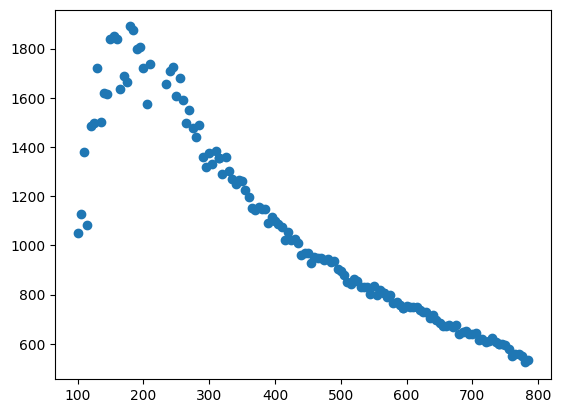

In [ ]:
plt.scatter(radios*785, TVELS)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

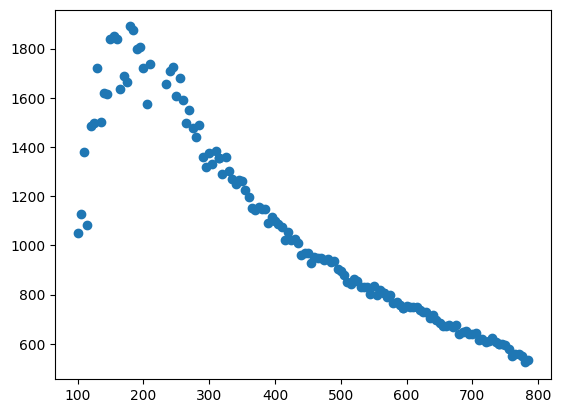

In [ ]:
Radios = radios*785

plt.scatter(Radios, TVELS)

In [ ]:
Radios


array([100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.,
       155., 160., 165., 170., 175., 180., 185., 190., 195., 200., 205.,
       210., 235., 240., 245., 250., 255., 260., 265., 270., 275., 280.,
       285., 290., 295., 300., 305., 310., 315., 315., 320., 325., 330.,
       335., 340., 345., 350., 355., 360., 365., 370., 375., 380., 385.,
       390., 395., 400., 405., 410., 415., 420., 425., 430., 435., 440.,
       445., 450., 455., 460., 465., 470., 475., 480., 485., 490., 495.,
       500., 505., 510., 515., 520., 525., 530., 535., 540., 545., 550.,
       555., 560., 565., 565., 570., 575., 580., 585., 590., 595., 595.,
       600., 605., 610., 615., 620., 625., 630., 635., 640., 645., 650.,
       655., 660., 665., 670., 675., 680., 685., 690., 695., 700., 705.,
       710., 715., 720., 725., 730., 735., 740., 740., 745., 750., 755.,
       760., 765., 770., 775., 780., 785.])

Parámetro C óptimo: 443977.61181865487
Parámetro c óptimo: 166.71467399672267


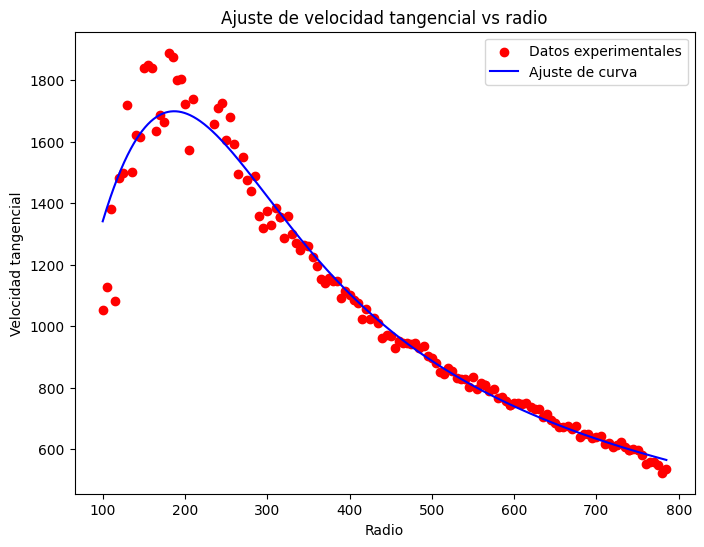

In [ ]:
# Definimos la ecuación a ajustar
def modelo_velocidad_tangencial(r, C, c):
    return (C / r) * (1 - np.exp(-(r**2) / (c**2)))
Radios = radios*785
# Realizamos el ajuste de curva
parametros_iniciales = [100, 100]  # Valores iniciales para C y c (puedes ajustarlos)
parametros_opt, covarianza = curve_fit(modelo_velocidad_tangencial, Radios, TVELS, p0=parametros_iniciales)

# Parámetros óptimos
C_opt, c_opt = parametros_opt
print(f"Parámetro C óptimo: {C_opt}")
print(f"Parámetro c óptimo: {c_opt}")

# Generamos la curva ajustada
radios_ajustados = np.linspace(min(Radios), max(Radios), 1000)
velocidad_ajustada = modelo_velocidad_tangencial(radios_ajustados, C_opt, c_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(Radios, TVELS, label="Datos experimentales", color="red")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad tangencial")
plt.title("Ajuste de velocidad tangencial vs radio")
plt.legend()
plt.show()

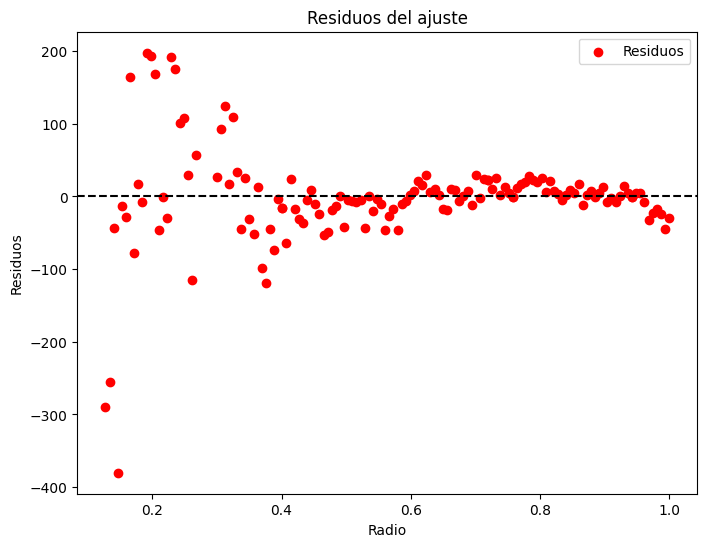

In [ ]:
# Calculamos los residuos
vt_ajustados = modelo_velocidad_tangencial(Radios, C_opt, c_opt)
residuos = TVELS - vt_ajustados

# Calculamos el error estándar de los parámetros
error_estandar = np.sqrt(np.diag(covarianza))

# Calculamos los grados de libertad
grados_libertad = len(TVELS) - len(parametros_opt)

# Calculamos los estadísticos t
t_values = parametros_opt / error_estandar

# Calculamos los p-valores usando la distribución t de Student
#p_values = [2 * (1 - stats.t.cdf(np.abs(t_val), grados_libertad)) for t_val in t_values]

# Mostramos los p-valores
#print(f"P-valor para C: {p_values[0]}")
#print(f"P-valor para c: {p_values[1]}")

# Graficamos los residuos
plt.figure(figsize=(8,6))
plt.scatter(radios, residuos, color='red', label="Residuos")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Radio")
plt.ylabel("Residuos")
plt.title("Residuos del ajuste")
plt.legend()
plt.show()

Parámetro nu óptimo: 1912.4138830444322


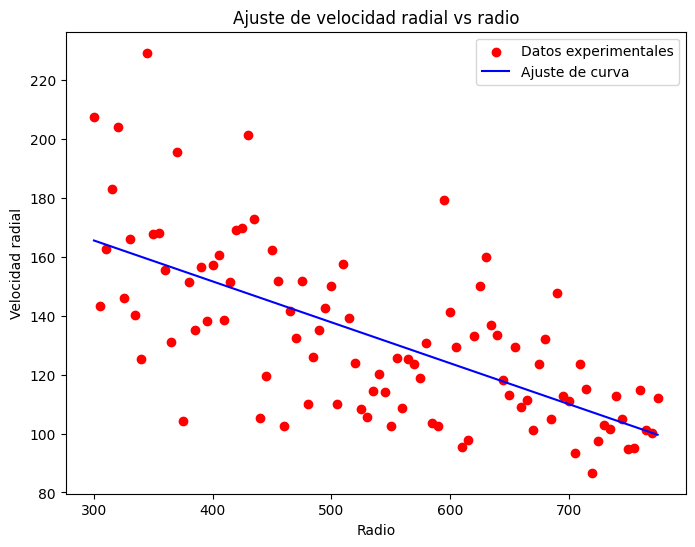

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Valor de c obtenido del ajuste anterior
c_fijo = 166
# Tus datos experimentales de velocidad radial (VELS) y radios
#radios = np.array([...])  # Agrega tus datos de radio aquí
VELS = np.array([-207.54046614278954, -143.23683333162836, -162.77786764764684, -182.98180903077431,
-203.94037055722, -145.89100814190485, -166.03203286278588, -140.1632390815804,
-125.3748488649032, -229.26084773499818, -167.62104980559303, -168.02123736713096,
-155.65317320289603, -131.00310355534464, -195.5010297486767, -104.28081886257297,
-151.337641928422, -135.19725705026858, -156.56487504937527, -138.19988398153288,
-157.21707259514778, -160.54647604121803, -138.61343244831843, -151.51562368918954,
-168.9267442118698, -169.8526572767578, -201.42598550360938, -172.8948103563856,
-105.1646030165935, -119.60703065174279, -162.23520323757958, -151.85140198582002,
-102.53251063141506, -141.58934859364268, -132.52494258052008, -151.62121492757782,
-110.09633507422546, -125.8526412033679, -135.1535923030036, -142.46562752648356,
-149.96025638871467, -110.02592662494423, -157.58062627481553, -139.1703732386234,
-123.90803554056905, -108.48110600040216, -105.6744889878915, -114.59546575707424,
-120.36063877250815, -114.16366224380569, -102.69037314928556, -125.79574721178314,
-108.67344332331662, -125.35860865211355, -123.5472497748164, -118.77796814143753,
-130.68350652130198, -103.63663919183442, -102.59942740813615, -179.36326341815953,
-141.33795634007157, -129.51634826426474, -95.40798841547573, -97.86633870997237,
-133.18369670895612, -150.23362888872438, -159.7860322361672, -136.85753697785822,
-133.61086606259008, -118.29619942840196, -113.12544230895085, -129.4635995641585,
-108.95003494513631, -111.46053363563628, -101.26771397270575, -123.68745446860282,
-132.10551548403174, -104.78155083302039, -147.64227751929954, -112.58715673452468,
-111.04060433871976, -93.39456404357958, -123.49942092467403, -114.96374953764058,
-86.70115718049925, -97.37565513491543, -102.84267622547877, -101.60271000013682,
-112.57912473862356, -104.78603587310579, -94.87548093750134, -95.25109492276785,
-114.92905479154456, -101.21268638996258, -100.34670941892252, -112.04274410116332]
)*(-1)
    # Agrega tus datos de velocidad radial aquí
RADIOS = np.array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415,
420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775]
)
# Definimos la ecuación a ajustar, manteniendo c fijo
def modelo_velocidad_radial(r, nu, b):
    return - (2 * nu / c_fijo**2) * r + b

# Realizamos el ajuste de curva para encontrar solo nu
parametros_iniciales = [1e-5, 180]  # Valor inicial para nu (puedes ajustarlo)
parametros_opt, covarianza = curve_fit(modelo_velocidad_radial, RADIOS, VELS, p0=parametros_iniciales)

# Parámetro óptimo nu
nu_opt = parametros_opt[0]
b_opt = parametros_opt[1]
# Imprimimos el parámetro óptimo nu
print(f"Parámetro nu óptimo: {nu_opt}")

# Generamos la curva ajustada
radios_ajustados = np.linspace(min(RADIOS), max(RADIOS), 500)
velocidad_ajustada = modelo_velocidad_radial(radios_ajustados, nu_opt, b_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(RADIOS, VELS, label="Datos experimentales", color="red")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad radial")
plt.title("Ajuste de velocidad radial vs radio")
plt.legend()
plt.show()

Y SI PASO D EPIXELES A METROS TODO DE ANTEMANO?

Parámetro C óptimo: 0.0018185321605176795
Parámetro c óptimo: -0.010669737597367605


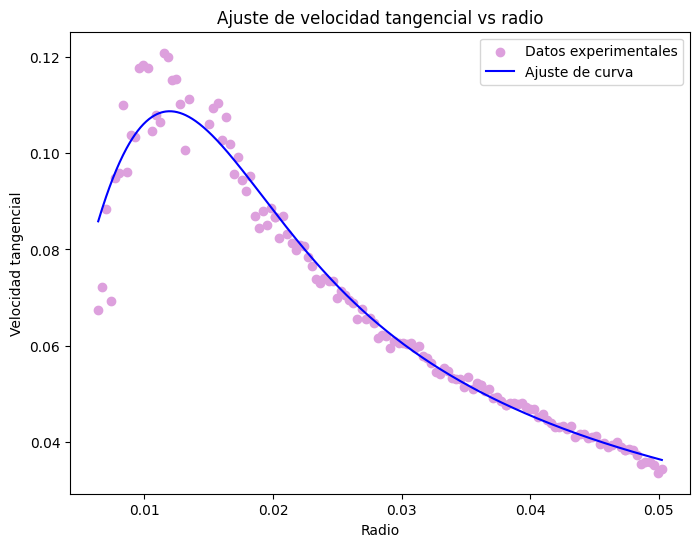

In [ ]:
# Definimos la ecuación a ajustar
def modelo_velocidad_tangencial(r, C, c):
    return (C / r) * (1 - np.exp(-(r**2) / (c**2)))
Radios = radios*785*(0.000064)
TVELS1  = TVELS*(0.000064)
# Realizamos el ajuste de curva
parametros_iniciales = [0.01, 1]  # Valores iniciales para C y c (puedes ajustarlos)
parametros_opt, covarianza = curve_fit(modelo_velocidad_tangencial, Radios, TVELS1, p0=parametros_iniciales)

# Parámetros óptimos
C_opt, c_opt = parametros_opt
print(f"Parámetro C óptimo: {C_opt}")
print(f"Parámetro c óptimo: {c_opt}")

# Generamos la curva ajustada
radios_ajustados = np.linspace(min(Radios), max(Radios), 1000)
velocidad_ajustada = modelo_velocidad_tangencial(radios_ajustados, C_opt, c_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(Radios, TVELS1, label="Datos experimentales", color="plum")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad tangencial")
plt.title("Ajuste de velocidad tangencial vs radio")
plt.legend()
plt.show()

Parámetro nu óptimo: 7.901227166775433e-06


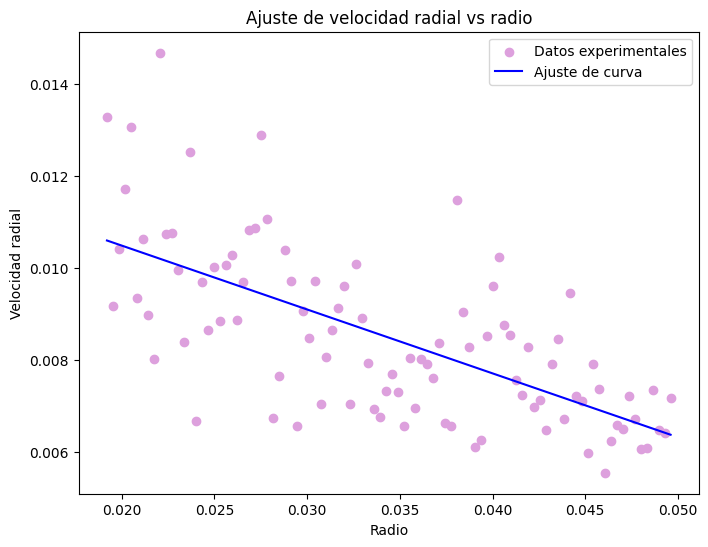

In [ ]:
c_fijo = 0.01067
# Tus datos experimentales de velocidad radial (VELS) y radios
#radios = np.array([...])  # Agrega tus datos de radio aquí
VELS = np.array([-207.54046614278954, -143.23683333162836, -162.77786764764684, -182.98180903077431,
-203.94037055722, -145.89100814190485, -166.03203286278588, -140.1632390815804,
-125.3748488649032, -229.26084773499818, -167.62104980559303, -168.02123736713096,
-155.65317320289603, -131.00310355534464, -195.5010297486767, -104.28081886257297,
-151.337641928422, -135.19725705026858, -156.56487504937527, -138.19988398153288,
-157.21707259514778, -160.54647604121803, -138.61343244831843, -151.51562368918954,
-168.9267442118698, -169.8526572767578, -201.42598550360938, -172.8948103563856,
-105.1646030165935, -119.60703065174279, -162.23520323757958, -151.85140198582002,
-102.53251063141506, -141.58934859364268, -132.52494258052008, -151.62121492757782,
-110.09633507422546, -125.8526412033679, -135.1535923030036, -142.46562752648356,
-149.96025638871467, -110.02592662494423, -157.58062627481553, -139.1703732386234,
-123.90803554056905, -108.48110600040216, -105.6744889878915, -114.59546575707424,
-120.36063877250815, -114.16366224380569, -102.69037314928556, -125.79574721178314,
-108.67344332331662, -125.35860865211355, -123.5472497748164, -118.77796814143753,
-130.68350652130198, -103.63663919183442, -102.59942740813615, -179.36326341815953,
-141.33795634007157, -129.51634826426474, -95.40798841547573, -97.86633870997237,
-133.18369670895612, -150.23362888872438, -159.7860322361672, -136.85753697785822,
-133.61086606259008, -118.29619942840196, -113.12544230895085, -129.4635995641585,
-108.95003494513631, -111.46053363563628, -101.26771397270575, -123.68745446860282,
-132.10551548403174, -104.78155083302039, -147.64227751929954, -112.58715673452468,
-111.04060433871976, -93.39456404357958, -123.49942092467403, -114.96374953764058,
-86.70115718049925, -97.37565513491543, -102.84267622547877, -101.60271000013682,
-112.57912473862356, -104.78603587310579, -94.87548093750134, -95.25109492276785,
-114.92905479154456, -101.21268638996258, -100.34670941892252, -112.04274410116332])*(-1)*(0.000064)
    # Agrega tus datos de velocidad radial aquí
RADIOS = np.array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415,
420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775])*(0.000064)

# Definimos la ecuación a ajustar, manteniendo c fijo
def modelo_velocidad_radial(r, nu, b):
    return - (2 * nu / c_fijo**2) * r + b

# Realizamos el ajuste de curva para encontrar solo nu
parametros_iniciales = [1e-5, 180]  # Valor inicial para nu (puedes ajustarlo)
parametros_opt, covarianza = curve_fit(modelo_velocidad_radial, RADIOS, VELS, p0=parametros_iniciales)

# Parámetro óptimo nu
nu_opt = parametros_opt[0]
b_opt = parametros_opt[1]
# Imprimimos el parámetro óptimo nu
print(f"Parámetro nu óptimo: {nu_opt}")

# Generamos la curva ajustada0.010669737597367605


radios_ajustados = np.linspace(min(RADIOS), max(RADIOS), 500)
velocidad_ajustada = modelo_velocidad_radial(radios_ajustados, nu_opt, b_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(RADIOS, VELS, label="Datos experimentales", color="plum")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad radial")
plt.title("Ajuste de velocidad radial vs radio")
plt.legend()
plt.show()

In [ ]:
np.diag(covarianza)

CONVERSON DE NICO

Parámetro C óptimo: 0.03406595432429168
Parámetro c óptimo: -0.04617995473836427


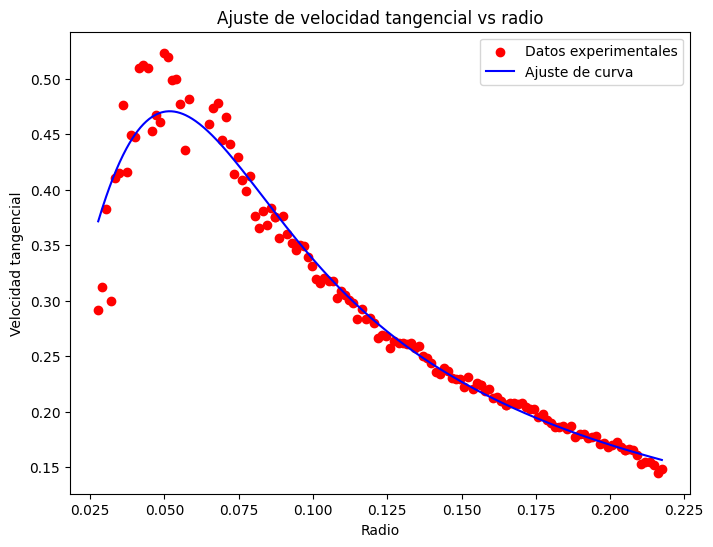

In [ ]:
# Definimos la ecuación a ajustar
def modelo_velocidad_tangencial(r, C, c):
    return (C / r) * (1 - np.exp(-(r**2) / (c**2)))
Radios = radios*785*(0.000277)
TVELS1  = TVELS*(0.000277)
# Realizamos el ajuste de curva
parametros_iniciales = [0.01, 1]  # Valores iniciales para C y c (puedes ajustarlos)
parametros_opt, covarianza = curve_fit(modelo_velocidad_tangencial, Radios, TVELS1, p0=parametros_iniciales)

# Parámetros óptimos
C_opt, c_opt = parametros_opt
print(f"Parámetro C óptimo: {C_opt}")
print(f"Parámetro c óptimo: {c_opt}")

# Generamos la curva ajustada
radios_ajustados = np.linspace(min(Radios), max(Radios), 1000)
velocidad_ajustada = modelo_velocidad_tangencial(radios_ajustados, C_opt, c_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(Radios, TVELS1, label="Datos experimentales", color="red")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad tangencial")
plt.title("Ajuste de velocidad tangencial vs radio")
plt.legend()
plt.show()

Parámetro nu óptimo: 0.00014685250973978163


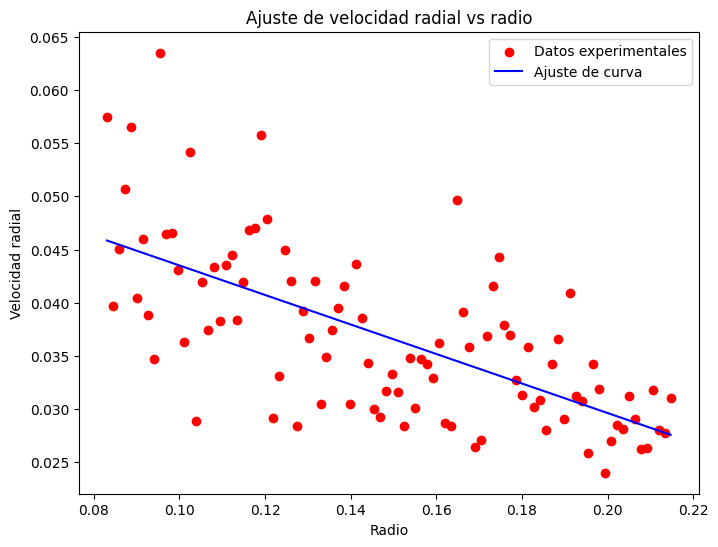

In [ ]:
c_fijo = 0.046
# Tus datos experimentales de velocidad radial (VELS) y radios
#radios = np.array([...])  # Agrega tus datos de radio aquí
VELS = np.array([-207.54046614278954, -143.23683333162836, -162.77786764764684, -182.98180903077431,
-203.94037055722, -145.89100814190485, -166.03203286278588, -140.1632390815804,
-125.3748488649032, -229.26084773499818, -167.62104980559303, -168.02123736713096,
-155.65317320289603, -131.00310355534464, -195.5010297486767, -104.28081886257297,
-151.337641928422, -135.19725705026858, -156.56487504937527, -138.19988398153288,
-157.21707259514778, -160.54647604121803, -138.61343244831843, -151.51562368918954,
-168.9267442118698, -169.8526572767578, -201.42598550360938, -172.8948103563856,
-105.1646030165935, -119.60703065174279, -162.23520323757958, -151.85140198582002,
-102.53251063141506, -141.58934859364268, -132.52494258052008, -151.62121492757782,
-110.09633507422546, -125.8526412033679, -135.1535923030036, -142.46562752648356,
-149.96025638871467, -110.02592662494423, -157.58062627481553, -139.1703732386234,
-123.90803554056905, -108.48110600040216, -105.6744889878915, -114.59546575707424,
-120.36063877250815, -114.16366224380569, -102.69037314928556, -125.79574721178314,
-108.67344332331662, -125.35860865211355, -123.5472497748164, -118.77796814143753,
-130.68350652130198, -103.63663919183442, -102.59942740813615, -179.36326341815953,
-141.33795634007157, -129.51634826426474, -95.40798841547573, -97.86633870997237,
-133.18369670895612, -150.23362888872438, -159.7860322361672, -136.85753697785822,
-133.61086606259008, -118.29619942840196, -113.12544230895085, -129.4635995641585,
-108.95003494513631, -111.46053363563628, -101.26771397270575, -123.68745446860282,
-132.10551548403174, -104.78155083302039, -147.64227751929954, -112.58715673452468,
-111.04060433871976, -93.39456404357958, -123.49942092467403, -114.96374953764058,
-86.70115718049925, -97.37565513491543, -102.84267622547877, -101.60271000013682,
-112.57912473862356, -104.78603587310579, -94.87548093750134, -95.25109492276785,
-114.92905479154456, -101.21268638996258, -100.34670941892252, -112.04274410116332])*(-1)*(0.000277)
    # Agrega tus datos de velocidad radial aquí
RADIOS = np.array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415,
420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775])*(0.000277)

# Definimos la ecuación a ajustar, manteniendo c fijo
def modelo_velocidad_radial(r, nu, b):
    return - (2 * nu / c_fijo**2) * r + b

# Realizamos el ajuste de curva para encontrar solo nu
parametros_iniciales = [1e-5, 180]  # Valor inicial para nu (puedes ajustarlo)
parametros_opt, covarianza = curve_fit(modelo_velocidad_radial, RADIOS, VELS, p0=parametros_iniciales)

# Parámetro óptimo nu
nu_opt = parametros_opt[0]
b_opt = parametros_opt[1]
# Imprimimos el parámetro óptimo nu
print(f"Parámetro nu óptimo: {nu_opt}")

# Generamos la curva ajustada0.010669737597367605


radios_ajustados = np.linspace(min(RADIOS), max(RADIOS), 500)
velocidad_ajustada = modelo_velocidad_radial(radios_ajustados, nu_opt, b_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(RADIOS, VELS, label="Datos experimentales", color="red")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad radial")
plt.title("Ajuste de velocidad radial vs radio")
plt.legend()
plt.show()

Parámetro C óptimo: 0.29927011215081434
Parámetro c óptimo: 0.2123753505277725


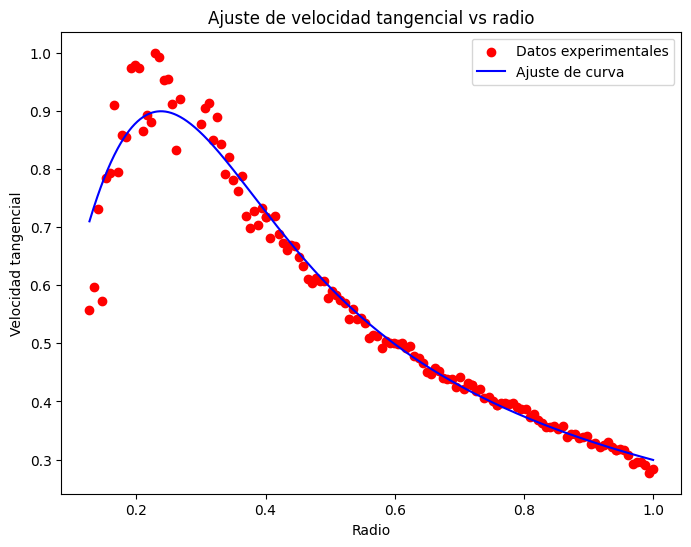

In [ ]:
# Definimos la ecuación a ajustar
def modelo_velocidad_tangencial(r, C, c):
    return (C / r) * (1 - np.exp(-(r**2) / (c**2)))
Radios = radios*785
# Realizamos el ajuste de curva
parametros_iniciales = [1, 1]  # Valores iniciales para C y c (puedes ajustarlos)
parametros_opt, covarianza = curve_fit(modelo_velocidad_tangencial, radios, vt, p0=parametros_iniciales)

# Parámetros óptimos
C_opt, c_opt = parametros_opt
print(f"Parámetro C óptimo: {C_opt}")
print(f"Parámetro c óptimo: {c_opt}")

# Generamos la curva ajustada
radios_ajustados = np.linspace(min(radios), max(radios), 1000)
velocidad_ajustada = modelo_velocidad_tangencial(radios_ajustados, C_opt, c_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(radios, vt, label="Datos experimentales", color="red")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad tangencial")
plt.title("Ajuste de velocidad tangencial vs radio")
plt.legend()
plt.show()

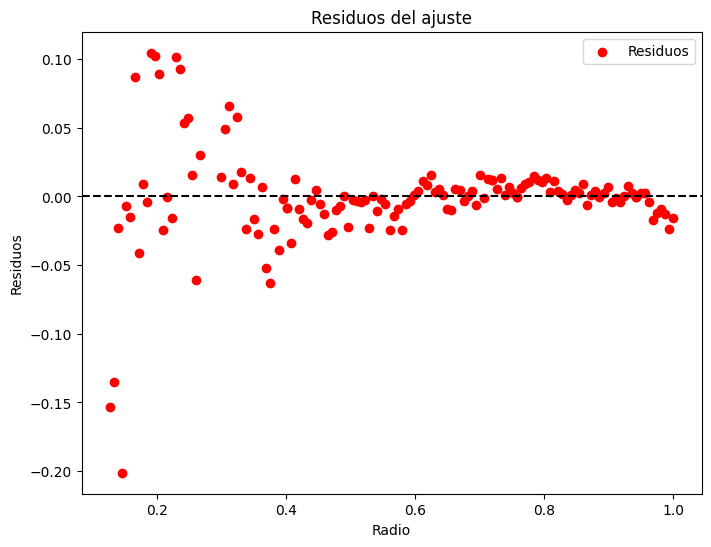

In [ ]:
# Calculamos los residuos
vt_ajustados = modelo_velocidad_tangencial(radios, C_opt, c_opt)
residuos = vt - vt_ajustados

# Calculamos el error estándar de los parámetros
error_estandar = np.sqrt(np.diag(covarianza))

# Calculamos los grados de libertad
grados_libertad = len(TVELS) - len(parametros_opt)

# Calculamos los estadísticos t
t_values = parametros_opt / error_estandar

# Calculamos los p-valores usando la distribución t de Student
#p_values = [2 * (1 - stats.t.cdf(np.abs(t_val), grados_libertad)) for t_val in t_values]

# Mostramos los p-valores
#print(f"P-valor para C: {p_values[0]}")
#print(f"P-valor para c: {p_values[1]}")

# Graficamos los residuos
plt.figure(figsize=(8,6))
plt.scatter(radios, residuos, color='red', label="Residuos")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Radio")
plt.ylabel("Residuos")
plt.title("Residuos del ajuste")
plt.legend()
plt.show()

In [ ]:
# Parámetros óptimos
C_opt, c_opt = parametros_opt
print(f"Parámetro C óptimo: {C_opt}")
print(f"Parámetro c óptimo: {c_opt}")

Parámetro C óptimo: 557.2262060167794
Parámetro c óptimo: -0.21179762537731853


In [ ]:
# Lista de cadenas
data = ["745: -97.37565513491543", "715: -112.58715673452468", "650: -159.7860322361672", "770: -94.87548093750134", "690: -101.26771397270575", "665: -118.29619942840196", "730: -123.49942092467403", "615: -179.36326341815953", "685: -111.46053363563628", "585: -125.35860865211355", "600: -130.68350652130198", "670: -113.12544230895085", "575: -125.79574721178314", "450: -201.42598550360938", "570: -102.69037314928556", "415: -138.19988398153288", "510: -135.1535923030036", "395: -104.28081886257297", "470: -162.23520323757958", "400: -151.337641928422", "805: -947.4886821732067", "610: -102.59942740813615", "435: -151.51562368918954", "620: -141.33795634007157", "710: -147.64227751929954", "635: -97.86633870997237", "530: -157.58062627481553", "580: -108.67344332331662", "235: -153.2820872848719", "725: -93.39456404357958", "495: -151.62121492757782", "255: -179.32056537770126", "375: -168.02123736713096", "765: -104.78603587310579", "180: -463.67259751571953", "155: -429.20500992417726", "430: -138.61343244831843", "455: -172.8948103563856", "420: -157.21707259514778", "390: -195.5010297486767", "110: -589.5033712531049", "490: -132.52494258052008", "525: -110.02592662494423", "100: -533.607230188755", "460: -105.1646030165935", "520: -149.96025638871467", "145: -436.97752521088387", "75: -620.4952742950417", "245: -264.72848014892435", "105: -534.9466816245681", "55: -635.4560867164114", "95: -655.6583152001766", "380: -155.65317320289603", "320: -207.54046614278954", "20: -392.816132024063", "550: -105.6744889878915", "780: -114.92905479154456", "60: -639.9821385312798", "45: -579.2724350436503", "120: -538.7134410177943", "80: -707.7460326741373", "295: -93.49837411222144", "500: -110.09633507422546", "555: -114.59546575707424", "335: -182.98180903077431", "140: -531.2641661546215", "165: -540.5548404688635", "135: -635.2266814447879", "645: -150.23362888872438", "270: -202.54773328112978", "365: -229.26084773499818", "275: -157.1677529795812", "540: -123.90803554056905", "625: -129.51634826426474", "590: -123.5472497748164", "280: -190.66525453975038", "705: -104.78155083302039", "340: -203.94037055722", "350: -166.03203286278588", "515: -142.46562752648356", "640: -133.18369670895612", "370: -167.62104980559303", "405: -135.19725705026858", "355: -140.1632390815804", "475: -151.85140198582002", "675: -129.4635995641585", "425: -160.54647604121803", "480: -102.53251063141506", "565: -114.16366224380569", "505: -125.8526412033679", "660: -133.61086606259008", "560: -120.36063877250815", "605: -103.63663919183442", "485: -141.58934859364268", "595: -118.77796814143753", "740: -86.70115718049925", "630: -95.40798841547573", "735: -114.96374953764058", "760: -112.57912473862356", "720: -111.04060433871976", "755: -101.60271000013682", "800: -174.3292874716512", "750: -102.84267622547877", "680: -108.95003494513631", "700: -132.10551548403174", "465: -119.60703065174279", "115: -582.8996859974307", "40: -524.2809489882463", "15: -567.1245485383668", "315: -131.2036877224365", "545: -108.48110600040216", "25: -444.34149954942774", "35: -514.4922722495451", "90: -729.1400515104034", "360: -125.3748488649032", "325: -143.23683333162836", "775: -95.25109492276785", "410: -156.56487504937527", "655: -136.85753697785822", "440: -168.9267442118698", "695: -123.68745446860282", "795: -112.04274410116332", "385: -131.00310355534464", "250: -156.65147300245073", "150: -448.3341482997478", "175: -481.3632896321919", "170: -528.443379638278", "785: -101.21268638996258", "330: -162.77786764764684", "535: -139.1703732386234", "790: -100.34670941892252", "260: -174.62362964676197", "185: -416.83961860601045", "160: -425.27735164597544", "65: -683.3063567945305", "310: -183.4926000666262", "70: -576.810606914671", "125: -538.1645042966356", "290: -109.88502698972997", "85: -514.7209253905752", "50: -620.2027759520365", "345: -145.89100814190485", "445: -169.8526572767578", "205: -365.0672349575507", "285: -158.83581744310052", "265: -186.21306884943192", "195: -413.33061177944035", "220: -417.39644694968547", "215: -454.96013614855195", "30: -528.9604876330652", "130: -540.803083168641", "210: -444.2410753327493", "190: -435.07434907073264", "305: -176.86564838425952", "200: -367.463654967572", "300: -160.73351002765818", "5: -762.7524514151098", "10: -414.9089039833827", "225: -335.7334673206787", "240: -201.37327725041672", "230: -322.4588117835413", "815: -1057.848699244424"]

# Ordenar la lista según el número antes de los dos puntos
sorted_data = sorted(data, key=lambda x: int(x.split(':')[0]))

# Imprimir la lista ordenada
for item in sorted_data:
    print(item)

5: -762.7524514151098
10: -414.9089039833827
15: -567.1245485383668
20: -392.816132024063
25: -444.34149954942774
30: -528.9604876330652
35: -514.4922722495451
40: -524.2809489882463
45: -579.2724350436503
50: -620.2027759520365
55: -635.4560867164114
60: -639.9821385312798
65: -683.3063567945305
70: -576.810606914671
75: -620.4952742950417
80: -707.7460326741373
85: -514.7209253905752
90: -729.1400515104034
95: -655.6583152001766
100: -533.607230188755
105: -534.9466816245681
110: -589.5033712531049
115: -582.8996859974307
120: -538.7134410177943
125: -538.1645042966356
130: -540.803083168641
135: -635.2266814447879
140: -531.2641661546215
145: -436.97752521088387
150: -448.3341482997478
155: -429.20500992417726
160: -425.27735164597544
165: -540.5548404688635
170: -528.443379638278
175: -481.3632896321919
180: -463.67259751571953
185: -416.83961860601045
190: -435.07434907073264
195: -413.33061177944035
200: -367.463654967572
205: -365.0672349575507
210: -444.2410753327493
215: -454.

In [ ]:
# Extraer los números a la izquierda y a la derecha de los dos puntos
izquierda = [int(item.split(':')[0]) for item in sorted_data]
derecha = [float(item.split(':')[1].strip()) for item in sorted_data]

# Imprimir las listas
print("Izquierda:", izquierda)
print("Derecha:", derecha)

Izquierda: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 815]
Derecha: [-762.7524514151098, -414.9089039833827, -567.1245485383668, -392.816132024063, -444.34149954942774, -528.9604876330652, -514.4922722495451, -524.2809489882463, -579.2724350436503, -620.202

In [ ]:
velss = np.array(derecha) # Access elements 59 and 155 separately and create a NumPy array
radioss = np.array(izquierda) # Access elements 59 and 155 separately and create a NumPy array

In [ ]:
radioss

array([ -762.75245142,  -414.90890398,  -567.12454854,  -392.81613202,
        -444.34149955,  -528.96048763,  -514.49227225,  -524.28094899,
        -579.27243504,  -620.20277595,  -635.45608672,  -639.98213853,
        -683.30635679,  -576.81060691,  -620.4952743 ,  -707.74603267,
        -514.72092539,  -729.14005151,  -655.6583152 ,  -533.60723019,
        -534.94668162,  -589.50337125,  -582.899686  ,  -538.71344102,
        -538.1645043 ,  -540.80308317,  -635.22668144,  -531.26416615,
        -436.97752521,  -448.3341483 ,  -429.20500992,  -425.27735165,
        -540.55484047,  -528.44337964,  -481.36328963,  -463.67259752,
        -416.83961861,  -435.07434907,  -413.33061178,  -367.46365497,
        -365.06723496,  -444.24107533,  -454.96013615,  -417.39644695,
        -335.73346732,  -322.45881178,  -153.28208728,  -201.37327725,
        -264.72848015,  -156.651473  ,  -179.32056538,  -174.62362965,
        -186.21306885,  -202.54773328,  -157.16775298,  -190.66525454,
      

In [ ]:
np.min(velss[59:155]), np.max(velss[59:155])

(-229.26084773499818, -86.70115718049925)

In [ ]:
velsss = velss[59:155]*(1)/np.min(velss[59:155])
radiosss = radioss[59:155]/np.max(radioss[59:155])

In [ ]:
radiosss

array([-160.73351003, -176.86564838, -183.49260007, -131.20368772,
       -207.54046614, -143.23683333, -162.77786765, -182.98180903,
       -203.94037056, -145.89100814, -166.03203286, -140.16323908,
       -125.37484886, -229.26084773, -167.62104981, -168.02123737,
       -155.6531732 , -131.00310356, -195.50102975, -104.28081886,
       -151.33764193, -135.19725705, -156.56487505, -138.19988398,
       -157.2170726 , -160.54647604, -138.61343245, -151.51562369,
       -168.92674421, -169.85265728, -201.4259855 , -172.89481036,
       -105.16460302, -119.60703065, -162.23520324, -151.85140199,
       -102.53251063, -141.58934859, -132.52494258, -151.62121493,
       -110.09633507, -125.8526412 , -135.1535923 , -142.46562753,
       -149.96025639, -110.02592662, -157.58062627, -139.17037324,
       -123.90803554, -108.481106  , -105.67448899, -114.59546576,
       -120.36063877, -114.16366224, -102.69037315, -125.79574721,
       -108.67344332, -125.35860865, -123.54724977, -118.77796

In [ ]:
len(RADIOS)

162

Parámetro nu óptimo: 0.01064012321921166


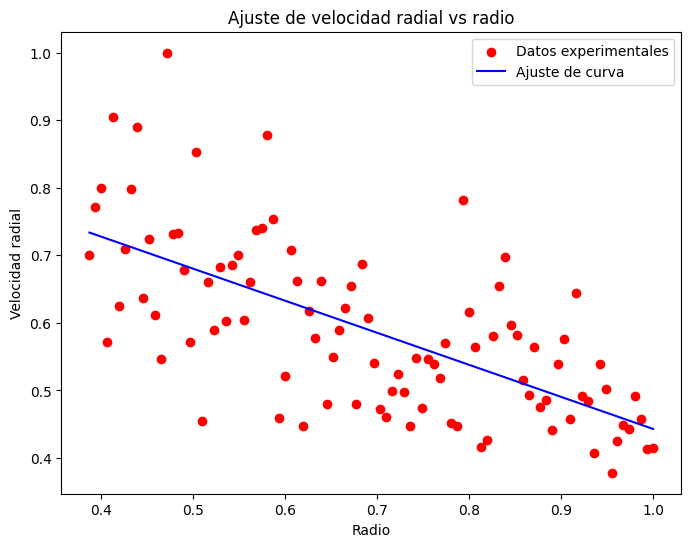

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Valor de c obtenido del ajuste anterior
c_fijo = -0.21179762537731853

# Tus datos experimentales de velocidad radial (VELS) y radios
#radios = np.array([...])  # Agrega tus datos de radio aquí
VELS = np.array([-207.54046614278954, -143.23683333162836, -162.77786764764684, -182.98180903077431,
-203.94037055722, -145.89100814190485, -166.03203286278588, -140.1632390815804,
-125.3748488649032, -229.26084773499818, -167.62104980559303, -168.02123736713096,
-155.65317320289603, -131.00310355534464, -195.5010297486767, -104.28081886257297,
-151.337641928422, -135.19725705026858, -156.56487504937527, -138.19988398153288,
-157.21707259514778, -160.54647604121803, -138.61343244831843, -151.51562368918954,
-168.9267442118698, -169.8526572767578, -201.42598550360938, -172.8948103563856,
-105.1646030165935, -119.60703065174279, -162.23520323757958, -151.85140198582002,
-102.53251063141506, -141.58934859364268, -132.52494258052008, -151.62121492757782,
-110.09633507422546, -125.8526412033679, -135.1535923030036, -142.46562752648356,
-149.96025638871467, -110.02592662494423, -157.58062627481553, -139.1703732386234,
-123.90803554056905, -108.48110600040216, -105.6744889878915, -114.59546575707424,
-120.36063877250815, -114.16366224380569, -102.69037314928556, -125.79574721178314,
-108.67344332331662, -125.35860865211355, -123.5472497748164, -118.77796814143753,
-130.68350652130198, -103.63663919183442, -102.59942740813615, -179.36326341815953,
-141.33795634007157, -129.51634826426474, -95.40798841547573, -97.86633870997237,
-133.18369670895612, -150.23362888872438, -159.7860322361672, -136.85753697785822,
-133.61086606259008, -118.29619942840196, -113.12544230895085, -129.4635995641585,
-108.95003494513631, -111.46053363563628, -101.26771397270575, -123.68745446860282,
-132.10551548403174, -104.78155083302039, -147.64227751929954, -112.58715673452468,
-111.04060433871976, -93.39456404357958, -123.49942092467403, -114.96374953764058,
-86.70115718049925, -97.37565513491543, -102.84267622547877, -101.60271000013682,
-112.57912473862356, -104.78603587310579, -94.87548093750134, -95.25109492276785,
-114.92905479154456, -101.21268638996258, -100.34670941892252, -112.04274410116332]
)
    # Agrega tus datos de velocidad radial aquí
RADIOS = np.array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415,
420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775]
)
# Definimos la ecuación a ajustar, manteniendo c fijo
def modelo_velocidad_radial(r, nu, b):
    return - (2 * nu / c_fijo**2) * r + b

# Realizamos el ajuste de curva para encontrar solo nu
parametros_iniciales = [1e-5, 180]  # Valor inicial para nu (puedes ajustarlo)
parametros_opt, covarianza = curve_fit(modelo_velocidad_radial, radiosss, velsss, p0=parametros_iniciales)

# Parámetro óptimo nu
nu_opt = parametros_opt[0]
b_opt = parametros_opt[1]
# Imprimimos el parámetro óptimo nu
print(f"Parámetro nu óptimo: {nu_opt}")

# Generamos la curva ajustada
radios_ajustados = np.linspace(min(radiosss), max(radiosss), 500)
velocidad_ajustada = modelo_velocidad_radial(radios_ajustados, nu_opt, b_opt)

# Graficamos los resultados
plt.figure(figsize=(8,6))
plt.scatter(radiosss, velsss, label="Datos experimentales", color="red")
plt.plot(radios_ajustados, velocidad_ajustada, label="Ajuste de curva", color="blue")
plt.xlabel("Radio")
plt.ylabel("Velocidad radial")
plt.title("Ajuste de velocidad radial vs radio")
plt.legend()
plt.show()


In [ ]:
nuuu = 0.01064012321921166 * ((np.max(radioss[59:155]) - np.min(radioss[59:155]))/np.max(radioss[59:155]))* np.min(velss[59:155])*(-1)

nuuu

1.4950938617930567

In [ ]:
nu4= 0.01064012321921166 * np.min(velss[59:155])*(-1) * 775
nu4

1890.5068436620097

In [ ]:
np.max(radioss[59:155]), np.min(radioss[59:155])

(775, 300)

PINN LAST TRY

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

TVELS = (1/0.05024)*(6.4e-5)*np.array([630.1216543642784, 860.9362219834856, 565.5460979611845, 1007.0589389438265, 738.4472355101198, 742.2539865867836, 896.1816167580935, 811.1978833878396, 783.6354400434568, 1052.4294966165698, 1009.2009811753622, 1025.8637187377155, 1010.7408595593661, 1018.780156115248, 1051.787785858392, 1129.1249333791077, 1381.5788934662428, 1081.5868843365881, 1483.4834423665436, 1498.4408574573001, 1719.8259858498554, 1503.224236447944, 1621.0840589624786, 1616.5159429854768, 1840.1931536410143, 1851.064445127872, 1839.0728870706469, 1634.8558786550363, 1688.0635454847575, 1664.9426908634127, 1889.8530464254793, 1874.4597541371963, 1800.2860632226627, 1804.5617091271238, 1722.7813414674506, 1572.7102838015678, 1738.089992261383, 1656.7873218914365, 1709.171027124684, 1727.1020030438854, 1605.9215669327964, 1682.0540336443403, 1591.4728944982376, 1496.8345678903445, 1549.7849898193856, 1476.7938912999323, 1440.0338560078449, 1487.347084630033, 1357.9321238229506, 1320.543560143046, 1376.5136019414608, 1330.4027373122904, 1383.5639621729122, 1354.4287353655486, 1354.4287353655486, 1288.3591112160102, 1359.5612029767826, 1301.7701591262924, 1271.4106256460059, 1249.34745712869, 1264.0741526310755, 1261.9960482642025, 1226.356145604258, 1196.891957828173, 1153.361845985948, 1142.3491159591017, 1157.8418409887138, 1148.3924510876734, 1147.579118778793, 1091.991771142622, 1115.4168340763447, 1100.607890051658, 1086.0513493161006, 1075.3699280659034, 1023.9109184044421, 1056.2163289907191, 1023.3390729524866, 1027.0375102655737, 1009.3673372959955, 962.123731695744, 970.3816673019655, 968.9137692493799, 929.0489425561822, 953.8938565892319, 947.4316852017685, 946.8001566615671, 941.2393623273842, 945.781407555651, 931.0265921525205, 935.7355863062602, 902.28793272351, 897.5003526969713, 881.4276241122085, 852.4712596344967, 843.7369452300744, 864.0057491650085, 854.0726086366512, 830.9174041663857, 829.9921805469652, 829.4117102763585, 802.1223717225246, 836.9115445080895, 797.869869185419, 817.2148325451838, 808.1560860110772, 808.1560860110772, 789.1632475065262, 797.8956330373726, 767.0672581657439, 771.2375890977444, 757.0753723056487, 745.868334533519, 745.868334533519, 751.7690215828686, 750.3229508806745, 748.1863963462565, 750.3307104609352, 738.957397557421, 729.6565417584213, 729.9309164307355, 704.8952313043269, 715.3204898675575, 696.2675992446948, 686.2393548075413, 673.4364334962544, 674.2438378557573, 676.5929655159998, 667.088203775376, 675.2202225902827, 641.0896781588339, 649.8605531599604, 650.9658018979902, 638.4014511469359, 638.9907205691078, 642.8738198181424, 617.1880468826912, 619.1243535038276, 608.4269683765434, 613.0712527269109, 622.9412252446302, 608.7894363371355, 598.9379753072034, 598.9379753072034, 600.785465054654, 596.4581039991596, 580.4464187333947, 552.0690588343261, 557.4654711083018, 559.3251557943821, 548.9590973237665, 524.0573450395754, 535.5548320702272])

radios =  (1/0.05024)*(6.4e-5)*np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785])
vt = TVELS

#vt = TVELS / np.max(TVELS)  # Velocidades tangenciales

# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios, dtype=torch.float32, requires_grad=True).view(-1, 1)
vt_t = torch.tensor(vt, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([0.33]), requires_grad=True)  # Parámetro nu
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))  # Usar tanh para suavidad
        output = self.layers[-1](h)
        return output

In [ ]:
radios

array([0.03821656, 0.04458599, 0.05095541, 0.05732484, 0.06369427,
       0.07006369, 0.07643312, 0.08280255, 0.08917197, 0.0955414 ,
       0.10191083, 0.10828025, 0.11464968, 0.12101911, 0.12738854,
       0.13375796, 0.14012739, 0.14649682, 0.15286624, 0.15923567,
       0.1656051 , 0.17197452, 0.17834395, 0.18471338, 0.1910828 ,
       0.19745223, 0.20382166, 0.21019108, 0.21656051, 0.22292994,
       0.22929936, 0.23566879, 0.24203822, 0.24840764, 0.25477707,
       0.2611465 , 0.26751592, 0.29936306, 0.30573248, 0.31210191,
       0.31847134, 0.32484076, 0.33121019, 0.33757962, 0.34394904,
       0.35031847, 0.3566879 , 0.36305732, 0.36942675, 0.37579618,
       0.38216561, 0.38853503, 0.39490446, 0.40127389, 0.40127389,
       0.40764331, 0.41401274, 0.42038217, 0.42675159, 0.43312102,
       0.43949045, 0.44585987, 0.4522293 , 0.45859873, 0.46496815,
       0.47133758, 0.47770701, 0.48407643, 0.49044586, 0.49681529,
       0.50318471, 0.50955414, 0.51592357, 0.52229299, 0.52866

In [ ]:
radios_physics = np.linspace(0.05, 1, 1000)
radios_physics_t = torch.tensor(radios_physics, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [ ]:
Radios_physics = (1/0.05024)*radios_physics

In [ ]:
mlp = MLP([1, 32, 32, 32, 1])
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

0 0.005265846382826567 0.0016428555827587843 Training Loss: 0.006908701732754707
100 0.005256094969809055 0.0016450021648779511 Training Loss: 0.006901097018271685
200 0.005247457418590784 0.001647262484766543 Training Loss: 0.006894719786942005
300 0.005239758640527725 0.0016490917187184095 Training Loss: 0.006888850592076778
400 0.00528514850884676 0.0016475984593853354 Training Loss: 0.006932747084647417
500 0.00522738229483366 0.001652933075092733 Training Loss: 0.006880315486341715
600 0.00522248400375247 0.0016547412378713489 Training Loss: 0.006877225358039141
700 0.005218529608100653 0.001656326581723988 Training Loss: 0.006874856073409319
800 0.005214909091591835 0.0016579944640398026 Training Loss: 0.006872903555631638
900 0.0052435798570513725 0.001661514863371849 Training Loss: 0.006905094720423222
1000 0.005209506954997778 0.0016606939025223255 Training Loss: 0.0068702008575201035
1100 0.005207438487559557 0.0016617740038782358 Training Loss: 0.006869212724268436
1200 0.00

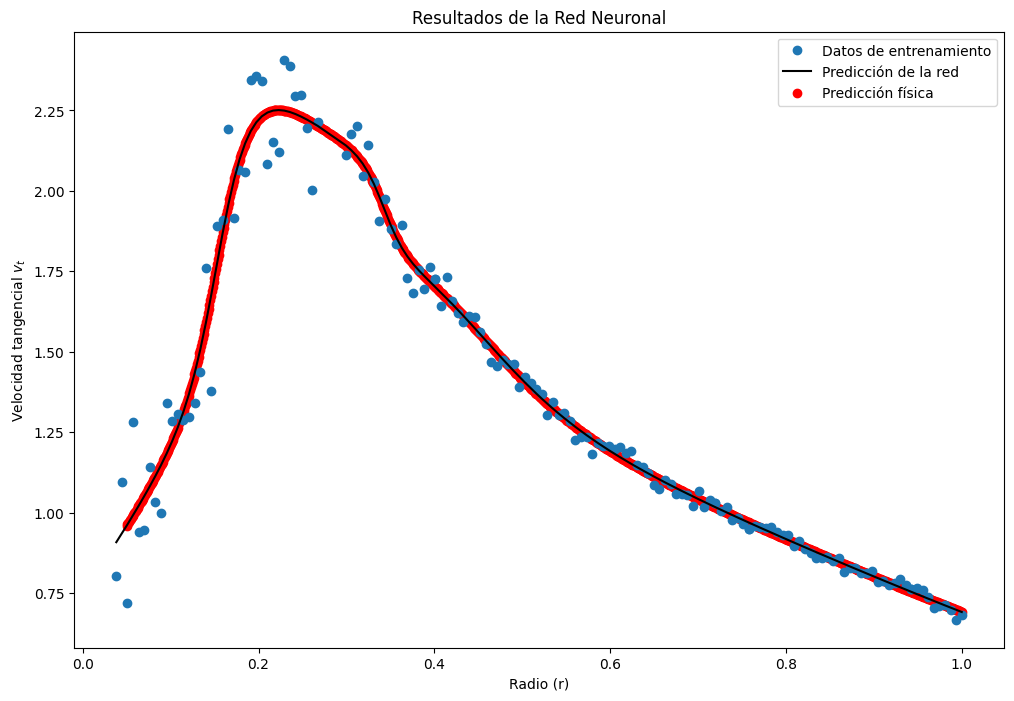

In [ ]:
# Entrenamiento del modelo
iterations = 2000
lambda_phy = 0.0001# Parámetro para la física

for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones para las velocidades tangenciales
    yh = mlp(radios_t)

    # Pérdida basada en los datos
    loss_data = torch.mean((yh - vt_t) ** 2)

    yhp = mlp(radios_physics_t)

    # Cálculo de la derivada
    du_theta = torch.autograd.grad(yhp, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # dy/dx
    du2_theta = torch.autograd.grad(du_theta, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # d^2y/dx^2

    # Ecuación diferencial: v_t = (nu/r) * (du_theta + r * du2_theta)
    physics = du_theta - (mlp.nu / radios_physics_t) * (du_theta + radios_physics_t * du2_theta)  # Igualar a cero
    loss_phy = lambda_phy * torch.mean(physics ** 2)  # Pérdida de física

    # Contornos
    physics_cc = du_theta

    # Pérdida total
    loss = loss_data + loss_phy
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(epoch, loss_data.item(), loss_phy.item(), "Training Loss:", loss.item())

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()


In [ ]:
0.0004*0.05

2e-05

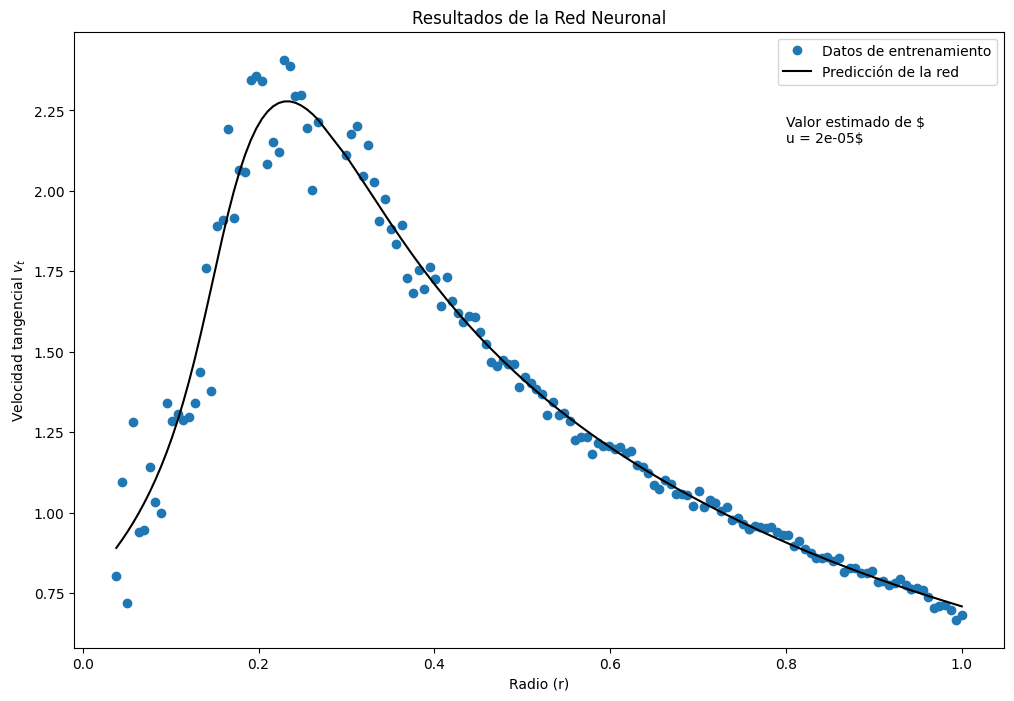

In [ ]:
# Visualizar los resultados
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    #plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    plt.title('Resultados de la Red Neuronal')
    plt.text(0.8, 2.15,f"Valor estimado de $\nu = 2e-05$ ")
    plt.show
    plt.show()

<ipython-input-291-31b17a206fdf>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red', color = 'cornflowerblue')


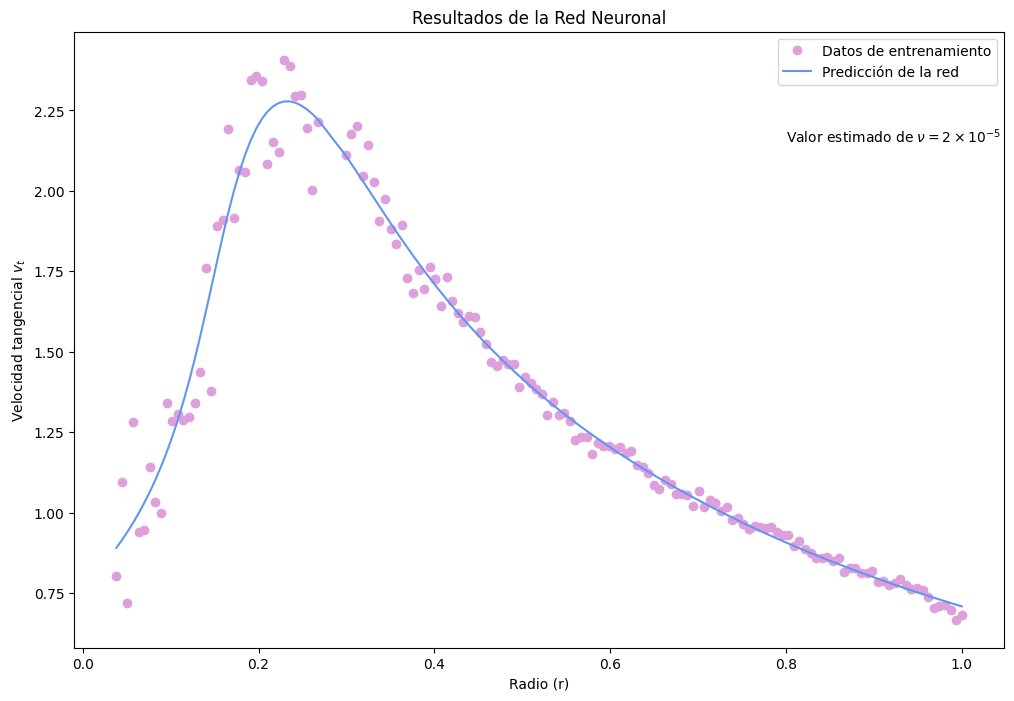

In [ ]:
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento', color = 'plum')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red', color = 'cornflowerblue')
    # plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    plt.title('Resultados de la Red Neuronal')
    plt.text(0.8, 2.15, r"Valor estimado de $\nu = 2 \times 10^{-5}$")
    plt.show()


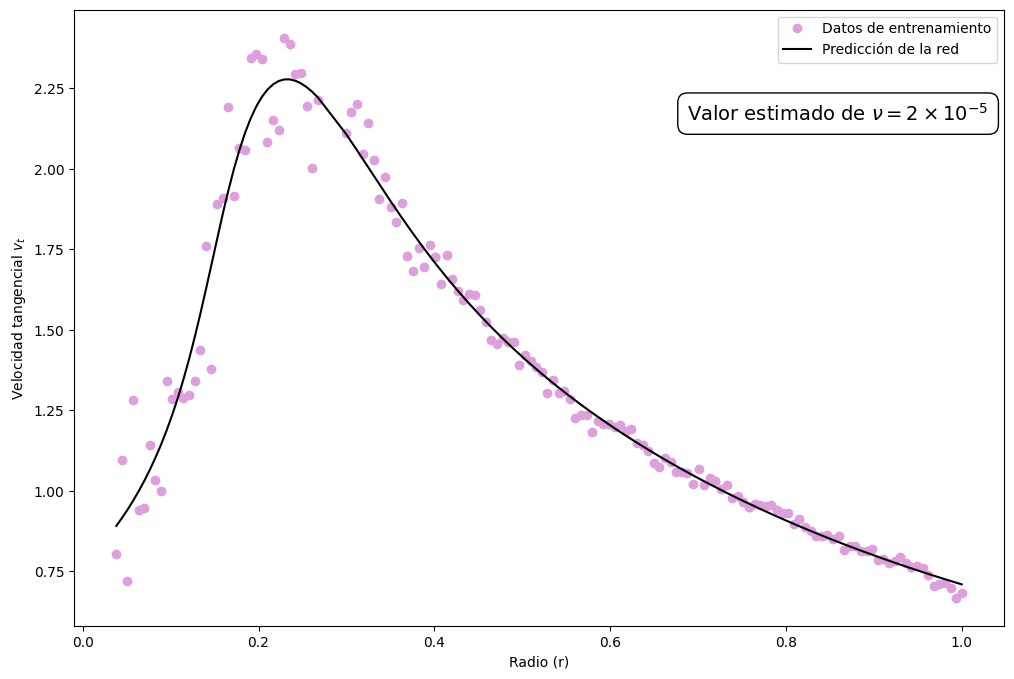

In [ ]:
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento', color = 'plum')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    # plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    #plt.title('Resultados de la Red Neuronal')

    # Añadir el texto con mayor tamaño y remarcado
    plt.text(0.688, 2.15, r"Valor estimado de $\nu = 2 \times 10^{-5}$",
             fontsize=14, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.show()


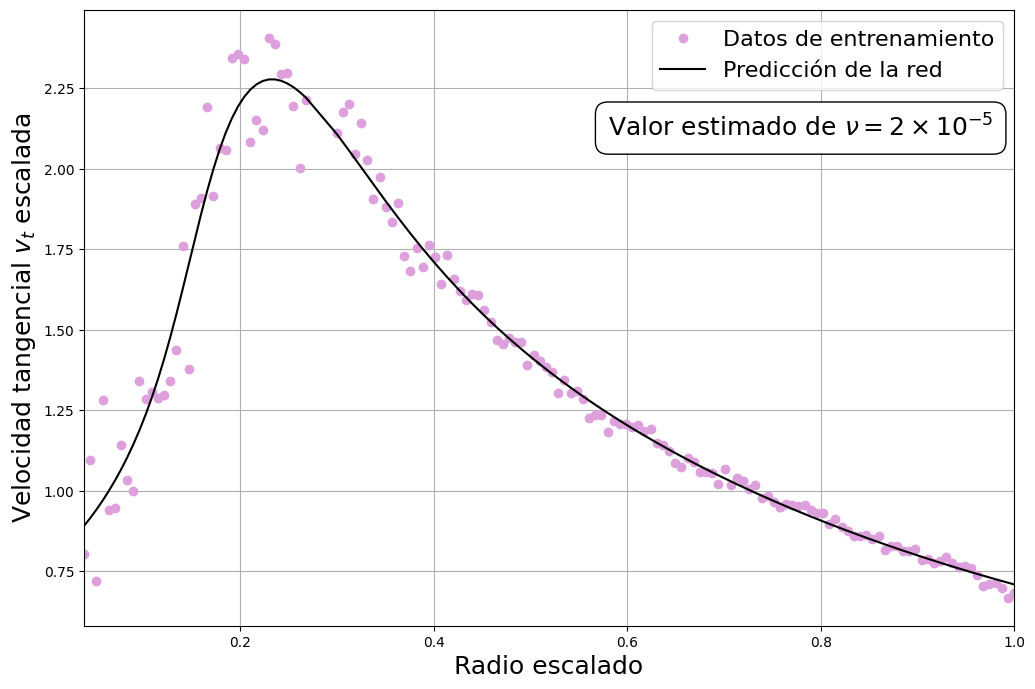

In [ ]:
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento', color='plum')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    # plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física')

    # Aumentar el tamaño de la leyenda
    plt.legend(fontsize=16)  # Cambia el tamaño de la leyenda aquí

    # Aumentar el tamaño de las etiquetas de los ejes
    plt.xlabel('Radio escalado', fontsize=18)  # Cambia el tamaño aquí
    plt.ylabel('Velocidad tangencial $v_t$ escalada', fontsize=18)  # Cambia el tamaño aquí
    # plt.title('Resultados de la Red Neuronal', fontsize=16)  # Si deseas incluir el título

    # Añadir el texto con mayor tamaño y remarcado
    plt.text(0.58, 2.1, r"Valor estimado de $\nu = 2 \times 10^{-5}$",
             fontsize=18, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    plt.grid(True)
    plt.xlim(radios[0], 1)
    #plt.ylim(0, 2)
    plt.show()


PINN CON CONTORNOS

In [ ]:
# Datos del experimento
VELS = np.array([-160.73351002765818, -176.86564838425952, -183.4926000666262, -131.2036877224365,
-207.54046614278954, -143.23683333162836, -162.77786764764684, -182.98180903077431,
-203.94037055722, -145.89100814190485, -166.03203286278588, -140.1632390815804,
-125.3748488649032, -229.26084773499818, -167.62104980559303, -168.02123736713096,
-155.65317320289603, -131.00310355534464, -195.5010297486767, -104.28081886257297,
-151.337641928422, -135.19725705026858, -156.56487504937527, -138.19988398153288,
-157.21707259514778, -160.54647604121803, -138.61343244831843, -151.51562368918954,
-168.9267442118698, -201.42598550360938, -172.8948103563856, -105.1646030165935,
-119.60703065174279, -162.23520323757958, -151.85140198582002, -102.53251063141506,
-141.58934859364268, -132.52494258052008, -151.62121492757782, -110.09633507422546,
-125.8526412033679, -135.1535923030036, -142.46562752648356, -149.96025638871467,
-110.02592662494423, -157.58062627481553, -139.1703732386234, -123.90803554056905,
-108.48110600040216, -105.6744889878915, -114.59546575707424, -120.36063877250815,
-114.16366224380569, -102.69037314928556, -125.79574721178314, -125.35860865211355,
-118.77796814143753, -130.68350652130198, -103.63663919183442, -102.59942740813615,
-179.36326341815953, -141.33795634007157, -129.51634826426474, -95.40798841547573,
-97.86633870997237, -133.18369670895612, -150.23362888872438, -159.7860322361672,
-136.85753697785822, -133.61086606259008, -118.29619942840196, -113.12544230895085,
-129.4635995641585, -108.95003494513631, -111.46053363563628, -101.26771397270575,
-123.68745446860282, -132.10551548403174, -104.78155083302039, -147.64227751929954,
-112.58715673452468, -111.04060433871976, -93.39456404357958, -123.49942092467403,
-114.96374953764058, -86.70115718049925, -97.37565513491543, -102.84267622547877,
-101.60271000013682, -112.57912473862356, -104.78603587310579, -94.87548093750134,
-95.25109492276785, -114.92905479154456, -101.21268638996258, -100.34670941892252,
-112.04274410116332])*(1/0.05024)*(6.4e-5)*(-1)

radios = (1/780)*np.array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375,
380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455,
460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695,
700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780])*(1/0.05024)*(6.4e-5)
#vr = VELS *(-1) # Escalar las velocidades

vr_t = torch.tensor(VELS, dtype=torch.float32, requires_grad=True).view(-1, 1)
rradios_t = torch.tensor(radios, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

TVELS = (1/0.05024)*(6.4e-5)*np.array([630.1216543642784, 860.9362219834856, 565.5460979611845, 1007.0589389438265, 738.4472355101198, 742.2539865867836, 896.1816167580935, 811.1978833878396, 783.6354400434568, 1052.4294966165698, 1009.2009811753622, 1025.8637187377155, 1010.7408595593661, 1018.780156115248, 1051.787785858392, 1129.1249333791077, 1381.5788934662428, 1081.5868843365881, 1483.4834423665436, 1498.4408574573001, 1719.8259858498554, 1503.224236447944, 1621.0840589624786, 1616.5159429854768, 1840.1931536410143, 1851.064445127872, 1839.0728870706469, 1634.8558786550363, 1688.0635454847575, 1664.9426908634127, 1889.8530464254793, 1874.4597541371963, 1800.2860632226627, 1804.5617091271238, 1722.7813414674506, 1572.7102838015678, 1738.089992261383, 1656.7873218914365, 1709.171027124684, 1727.1020030438854, 1605.9215669327964, 1682.0540336443403, 1591.4728944982376, 1496.8345678903445, 1549.7849898193856, 1476.7938912999323, 1440.0338560078449, 1487.347084630033, 1357.9321238229506, 1320.543560143046, 1376.5136019414608, 1330.4027373122904, 1383.5639621729122, 1354.4287353655486, 1354.4287353655486, 1288.3591112160102, 1359.5612029767826, 1301.7701591262924, 1271.4106256460059, 1249.34745712869, 1264.0741526310755, 1261.9960482642025, 1226.356145604258, 1196.891957828173, 1153.361845985948, 1142.3491159591017, 1157.8418409887138, 1148.3924510876734, 1147.579118778793, 1091.991771142622, 1115.4168340763447, 1100.607890051658, 1086.0513493161006, 1075.3699280659034, 1023.9109184044421, 1056.2163289907191, 1023.3390729524866, 1027.0375102655737, 1009.3673372959955, 962.123731695744, 970.3816673019655, 968.9137692493799, 929.0489425561822, 953.8938565892319, 947.4316852017685, 946.8001566615671, 941.2393623273842, 945.781407555651, 931.0265921525205, 935.7355863062602, 902.28793272351, 897.5003526969713, 881.4276241122085, 852.4712596344967, 843.7369452300744, 864.0057491650085, 854.0726086366512, 830.9174041663857, 829.9921805469652, 829.4117102763585, 802.1223717225246, 836.9115445080895, 797.869869185419, 817.2148325451838, 808.1560860110772, 808.1560860110772, 789.1632475065262, 797.8956330373726, 767.0672581657439, 771.2375890977444, 757.0753723056487, 745.868334533519, 745.868334533519, 751.7690215828686, 750.3229508806745, 748.1863963462565, 750.3307104609352, 738.957397557421, 729.6565417584213, 729.9309164307355, 704.8952313043269, 715.3204898675575, 696.2675992446948, 686.2393548075413, 673.4364334962544, 674.2438378557573, 676.5929655159998, 667.088203775376, 675.2202225902827, 641.0896781588339, 649.8605531599604, 650.9658018979902, 638.4014511469359, 638.9907205691078, 642.8738198181424, 617.1880468826912, 619.1243535038276, 608.4269683765434, 613.0712527269109, 622.9412252446302, 608.7894363371355, 598.9379753072034, 598.9379753072034, 600.785465054654, 596.4581039991596, 580.4464187333947, 552.0690588343261, 557.4654711083018, 559.3251557943821, 548.9590973237665, 524.0573450395754, 535.5548320702272])

radios =  (1/0.05024)*(6.4e-5)*np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760, 765, 770, 775, 780])
vt = TVELS[:50]

#vt = TVELS / np.max(TVELS)  # Velocidades tangenciales

# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios, dtype=torch.float32, requires_grad=True).view(-1, 1)
vt_t = torch.tensor(vt, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([0.0001]), requires_grad=True)  # Parámetro nu
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))  # Usar tanh para suavidad
        output = self.layers[-1](h)
        return output

In [ ]:
Rads = radios[50:]/((1/0.05024)*(6.4e-5))
print(Rads)

[300. 305. 310. 315. 315. 320. 325. 330. 335. 340. 345. 350. 355. 360.
 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415. 420. 425. 430.
 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485. 490. 495. 500.
 505. 510. 515. 520. 525. 530. 535. 540. 545. 550. 555. 560. 565. 565.
 570. 575. 580. 585. 590. 595. 595. 600. 605. 610. 615. 620. 625. 630.
 635. 640. 645. 650. 655. 660. 665. 670. 675. 680. 685. 690. 695. 700.
 705. 710. 715. 720. 725. 730. 735. 740. 740. 745. 750. 755. 760. 765.
 770. 775. 780.]


In [ ]:
radios_physics = np.linspace(0.05, 1.2, 1000)
radios_physics_t = torch.tensor(radios_physics, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [ ]:
mlp = MLP([1, 32, 32, 32, 1])
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

Epoch 0: Loss data: 0.01094, Loss phy: 0.08055, Loss cc: 0.00003, Total loss: 0.09153
Epoch 100: Loss data: 0.01067, Loss phy: 0.00973, Loss cc: 0.00003, Total loss: 0.02043
Epoch 200: Loss data: 0.01062, Loss phy: 0.00945, Loss cc: 0.00003, Total loss: 0.02009
Epoch 300: Loss data: 0.01060, Loss phy: 0.00932, Loss cc: 0.00021, Total loss: 0.02013
Epoch 400: Loss data: 0.01052, Loss phy: 0.00923, Loss cc: 0.00002, Total loss: 0.01978
Epoch 500: Loss data: 0.01043, Loss phy: 0.00919, Loss cc: 0.00002, Total loss: 0.01965
Epoch 600: Loss data: 0.01033, Loss phy: 0.00917, Loss cc: 0.00002, Total loss: 0.01952
Epoch 700: Loss data: 0.01021, Loss phy: 0.00916, Loss cc: 0.00002, Total loss: 0.01939
Epoch 800: Loss data: 0.01008, Loss phy: 0.00915, Loss cc: 0.00004, Total loss: 0.01927
Epoch 900: Loss data: 0.00995, Loss phy: 0.00915, Loss cc: 0.00002, Total loss: 0.01912
Epoch 1000: Loss data: 0.00981, Loss phy: 0.00915, Loss cc: 0.00002, Total loss: 0.01898
Epoch 1100: Loss data: 0.00966, L

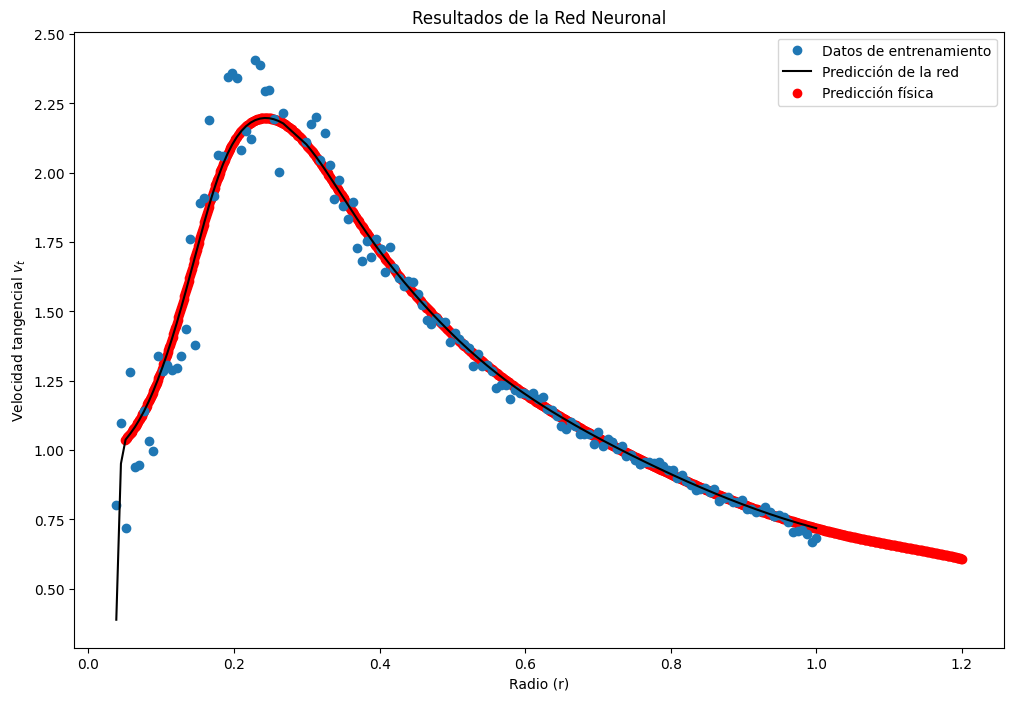

In [ ]:
# Entrenamiento del modelo
iterations = 2000
lambda_phy = 0.00  # Parámetro para la física
lambda_cc = 1     # Parámetro para la condición de contorno, ajustable

# Definir el radio en el que se quiere la condición de contorno
r_contorno1 = torch.tensor([1.5], requires_grad=True).float().to(radios_t.device)
r_contorno2 = torch.tensor([0.04], requires_grad=True).float().to(radios_t.device)

for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones para las velocidades tangenciales
    yh = mlp(radios_t)

    # Pérdida basada en los datos
    loss_data = torch.mean((yh - vt_t) ** 2)

    # ========================= Fisica =========================

    yhp = mlp(radios_physics_t)

    # Cálculo de la derivada
    du_theta = torch.autograd.grad(yhp, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # dy/dx
    du2_theta = torch.autograd.grad(du_theta, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # d^2y/dx^2

    # Ecuación diferencial: v_t = (nu/r) * (du_theta + r * du2_theta)
    physics = du_theta - (mlp.nu / radios_physics_t) * (du_theta + radios_physics_t * du2_theta)  # Igualar a cero
    loss_phy = lambda_phy * torch.mean(physics ** 2)  # Pérdida de física

    # ===================== Condición de contorno =====================
    # Predicción en el radio de contorno (r = 1.4)
    vel_contorno1 = mlp(r_contorno1)
    vel_contorno2 = mlp(r_contorno2)
    # Penalizar si la velocidad en el contorno no es cero
    loss_cc1 = lambda_cc * torch.mean(vel_contorno1 ** 2)

    # Penalizar si la velocidad en el contorno no es cero
    loss_cc2 = lambda_cc * torch.mean(vel_contorno2 ** 2)

    # Pérdida total
    loss_cc = loss_cc1 + loss_cc2

    # ===================== Pérdida total =====================
    loss = loss_data + loss_phy + loss_cc
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss data: {loss_data.item():.5f}, Loss phy: {loss_phy.item():.5f}, Loss cc: {loss_cc.item():.5f}, Total loss: {loss.item():.5f}")

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()


AHORA SI LAST TRY ULTIMO INTENTO

In [ ]:
# Datos del experimento
VELS = np.array([-160.73351002765818, -176.86564838425952, -183.4926000666262, -131.2036877224365,
-207.54046614278954, -143.23683333162836, -162.77786764764684, -182.98180903077431,
-203.94037055722, -145.89100814190485, -166.03203286278588, -140.1632390815804,
-125.3748488649032, -229.26084773499818, -167.62104980559303, -168.02123736713096,
-155.65317320289603, -131.00310355534464, -195.5010297486767, -104.28081886257297,
-151.337641928422, -135.19725705026858, -156.56487504937527, -138.19988398153288,
-157.21707259514778, -160.54647604121803, -138.61343244831843, -151.51562368918954,
-168.9267442118698, -201.42598550360938, -172.8948103563856, -105.1646030165935,
-119.60703065174279, -162.23520323757958, -151.85140198582002, -102.53251063141506,
-141.58934859364268, -132.52494258052008, -151.62121492757782, -110.09633507422546,
-125.8526412033679, -135.1535923030036, -142.46562752648356, -149.96025638871467,
-110.02592662494423, -157.58062627481553, -139.1703732386234, -123.90803554056905,
-108.48110600040216, -105.6744889878915, -114.59546575707424, -120.36063877250815,
-114.16366224380569, -102.69037314928556, -125.79574721178314, -125.35860865211355,
-118.77796814143753, -130.68350652130198, -103.63663919183442, -102.59942740813615,
-179.36326341815953, -141.33795634007157, -129.51634826426474, -95.40798841547573,
-97.86633870997237, -133.18369670895612, -150.23362888872438, -159.7860322361672,
-136.85753697785822, -133.61086606259008, -118.29619942840196, -113.12544230895085,
-129.4635995641585, -108.95003494513631, -111.46053363563628, -101.26771397270575,
-123.68745446860282, -132.10551548403174, -104.78155083302039, -147.64227751929954,
-112.58715673452468, -111.04060433871976, -93.39456404357958, -123.49942092467403,
-114.96374953764058, -86.70115718049925, -97.37565513491543, -102.84267622547877,
-101.60271000013682, -112.57912473862356, -104.78603587310579, -94.87548093750134,
-95.25109492276785, -114.92905479154456, -101.21268638996258, -100.34670941892252,
-112.04274410116332])*(1/0.05024)*(6.4e-5)*(-1)

Rradios = (1/780)*np.array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375,
380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455,
460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535,
540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695,
700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780])*(1/0.05024)*(6.4e-5)
#vr = VELS *(-1) # Escalar las velocidades

vr_t = torch.tensor(VELS, dtype=torch.float32, requires_grad=True).view(-1, 1)
rradios_t = torch.tensor(radios, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

TVELS = (1/0.05024)*(6.4e-5)*np.array([630.1216543642784, 860.9362219834856, 565.5460979611845, 1007.0589389438265, 738.4472355101198, 742.2539865867836, 896.1816167580935, 811.1978833878396, 783.6354400434568, 1052.4294966165698, 1009.2009811753622, 1025.8637187377155, 1010.7408595593661, 1018.780156115248, 1051.787785858392, 1129.1249333791077, 1381.5788934662428, 1081.5868843365881, 1483.4834423665436, 1498.4408574573001, 1719.8259858498554, 1503.224236447944, 1621.0840589624786, 1616.5159429854768, 1840.1931536410143, 1851.064445127872, 1839.0728870706469, 1634.8558786550363, 1688.0635454847575, 1664.9426908634127, 1889.8530464254793, 1874.4597541371963, 1800.2860632226627, 1804.5617091271238, 1722.7813414674506, 1572.7102838015678, 1738.089992261383, 1656.7873218914365, 1709.171027124684, 1727.1020030438854, 1605.9215669327964, 1682.0540336443403, 1591.4728944982376, 1496.8345678903445, 1549.7849898193856, 1476.7938912999323, 1440.0338560078449, 1487.347084630033, 1357.9321238229506, 1320.543560143046, 1376.5136019414608, 1330.4027373122904, 1383.5639621729122, 1354.4287353655486, 1354.4287353655486, 1288.3591112160102, 1359.5612029767826, 1301.7701591262924, 1271.4106256460059, 1249.34745712869, 1264.0741526310755, 1261.9960482642025, 1226.356145604258, 1196.891957828173, 1153.361845985948, 1142.3491159591017, 1157.8418409887138, 1148.3924510876734, 1147.579118778793, 1091.991771142622, 1115.4168340763447, 1100.607890051658, 1086.0513493161006, 1075.3699280659034, 1023.9109184044421, 1056.2163289907191, 1023.3390729524866, 1027.0375102655737, 1009.3673372959955, 962.123731695744, 970.3816673019655, 968.9137692493799, 929.0489425561822, 953.8938565892319, 947.4316852017685, 946.8001566615671, 941.2393623273842, 945.781407555651, 931.0265921525205, 935.7355863062602, 902.28793272351, 897.5003526969713, 881.4276241122085, 852.4712596344967, 843.7369452300744, 864.0057491650085, 854.0726086366512, 830.9174041663857, 829.9921805469652, 829.4117102763585, 802.1223717225246, 836.9115445080895, 797.869869185419, 817.2148325451838, 808.1560860110772, 808.1560860110772, 789.1632475065262, 797.8956330373726, 767.0672581657439, 771.2375890977444, 757.0753723056487, 745.868334533519, 745.868334533519, 751.7690215828686, 750.3229508806745, 748.1863963462565, 750.3307104609352, 738.957397557421, 729.6565417584213, 729.9309164307355, 704.8952313043269, 715.3204898675575, 696.2675992446948, 686.2393548075413, 673.4364334962544, 674.2438378557573, 676.5929655159998, 667.088203775376, 675.2202225902827, 641.0896781588339, 649.8605531599604, 650.9658018979902, 638.4014511469359, 638.9907205691078, 642.8738198181424, 617.1880468826912, 619.1243535038276, 608.4269683765434, 613.0712527269109, 622.9412252446302, 608.7894363371355, 598.9379753072034, 598.9379753072034, 600.785465054654, 596.4581039991596, 580.4464187333947, 552.0690588343261])

radios =  (1/0.05024)*(6.4e-5)*np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 565, 570, 575, 580, 585, 590, 595, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 740, 745, 750, 755, 760])
vt = TVELS[50:]
RADIOS = radios[50:]

#vt = TVELS / np.max(TVELS)  # Velocidades tangenciales

# Convertir a tensores de PyTorch
radios_t = torch.tensor(radios[50:], dtype=torch.float32, requires_grad=True).view(-1, 1)
vt_t = torch.tensor(vt, dtype=torch.float32).view(-1, 1)

# Definir el modelo MLP
class MLP(torch.nn.Module):
    def __init__(self, sizes):
        super().__init__()
        self.layers = torch.nn.ModuleList()
        self.nu = torch.nn.Parameter(torch.tensor([0.0001]), requires_grad=True)  # Parámetro nu
        for i in range(len(sizes) - 1):
            self.layers.append(torch.nn.Linear(sizes[i], sizes[i + 1]))

    def forward(self, x):
        h = x
        for hidden in self.layers[:-1]:
            h = torch.tanh(hidden(h))  # Usar tanh para suavidad
        output = self.layers[-1](h)
        return output

In [ ]:
RAD = radios[50:]/((1/0.05024)*(6.4e-5))
print(RAD)

[300. 305. 310. 315. 315. 320. 325. 330. 335. 340. 345. 350. 355. 360.
 365. 370. 375. 380. 385. 390. 395. 400. 405. 410. 415. 420. 425. 430.
 435. 440. 445. 450. 455. 460. 465. 470. 475. 480. 485. 490. 495. 500.
 505. 510. 515. 520. 525. 530. 535. 540. 545. 550. 555. 560. 565. 565.
 570. 575. 580. 585. 590. 595. 595. 600. 605. 610. 615. 620. 625. 630.
 635. 640. 645. 650. 655. 660. 665. 670. 675. 680. 685. 690. 695. 700.
 705. 710. 715. 720. 725. 730. 735. 740. 740. 745. 750. 755. 760. 765.
 770. 775. 780.]


In [ ]:
len(vt), len(vr_t), len(Rradios), len(radios_t)

(97, 97, 97, 97)

In [ ]:
radios_physics = np.linspace(0.05, 1.2, 1000)
radios_physics_t = torch.tensor(radios_physics, dtype=torch.float32, requires_grad=True).view(-1, 1)

In [ ]:
mlp = MLP([1, 32, 32, 32, 1])
optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)

In [ ]:
# Entrenamiento del modelo
iterations = 2000
lambda_phy = 0.001  # Parámetro para la física
lambda_cc = 1       # Parámetro para la condición de contorno, ajustable

# Definir el radio en el que se quiere la condición de contorno
r_contorno1 = torch.tensor([1.5], requires_grad=True).float().to(radios_t.device)
r_contorno2 = torch.tensor([0.04], requires_grad=True).float().to(radios_t.device)

# Suponiendo que ya tienes el array 'u_radial' para la velocidad radial
u_radial = mlp(radios_physics_t)  # Aquí debes definir tu array de velocidad radial

for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones para las velocidades tangenciales
    yh = mlp(radios_t)

    # Pérdida basada en los datos
    loss_data = torch.mean((yh - vt_t) ** 2)

    # ========================= Fisica =========================
    yhp = mlp(radios_physics_t)

    # Cálculo de la derivada
    du_theta = torch.autograd.grad(yhp, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # dy/dx
    du2_theta = torch.autograd.grad(du_theta, radios_physics_t, torch.ones_like(yhp), create_graph=True)[0]  # d^2y/dx^2

    # Ecuación diferencial con velocidad radial
    physics = (mlp.nu * du2_theta + (mlp.nu / radios_physics_t - u_radial) * du_theta
               - (u_radial / radios_physics_t + mlp.nu / radios_physics_t**2) * yhp)  # Igualar a cero
    loss_phy = lambda_phy * torch.mean(physics ** 2)  # Pérdida de física

    # ===================== Condición de contorno =====================
    # Predicción en el radio de contorno (r = 1.4)
    vel_contorno1 = mlp(r_contorno1)
    vel_contorno2 = mlp(r_contorno2)

    # Penalizar si la velocidad en el contorno no es cero
    loss_cc1 = lambda_cc * torch.mean(vel_contorno1 ** 2)
    loss_cc2 = lambda_cc * torch.mean(vel_contorno2 ** 2)

    # Pérdida total
    loss_cc = loss_cc1 + loss_cc2

    # ===================== Pérdida total =====================
    loss = loss_data + loss_phy + loss_cc
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss data: {loss_data.item():.5f}, Loss phy: {loss_phy.item():.5f}, Loss cc: {loss_cc.item():.5f}, Total loss: {loss.item():.5f}")

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(radios, vt, 'o', label='Datos de entrenamiento')
    plt.plot(radios, yh.numpy(), 'k-', label='Predicción de la red')
    plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad tangencial $v_t$')
    plt.title('Resultados de la Red Neuronal')
    plt.show()


Epoch 0: Loss data: 1.23657, Loss phy: 0.00000, Loss cc: 0.00764, Total loss: 1.24422


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

Epoch 0: Loss data: 0.00044, Loss phy: 0.00023, Loss cc: 0.00000, Total loss: 0.00067
Epoch 100: Loss data: 0.00044, Loss phy: 0.00022, Loss cc: 0.00000, Total loss: 0.00067
Epoch 200: Loss data: 0.00044, Loss phy: 0.00022, Loss cc: 0.00001, Total loss: 0.00068
Epoch 300: Loss data: 0.00044, Loss phy: 0.00022, Loss cc: 0.00000, Total loss: 0.00066
Epoch 400: Loss data: 0.00047, Loss phy: 0.00023, Loss cc: 0.00051, Total loss: 0.00121
Epoch 500: Loss data: 0.00044, Loss phy: 0.00022, Loss cc: 0.00000, Total loss: 0.00066
Epoch 600: Loss data: 0.00044, Loss phy: 0.00022, Loss cc: 0.00000, Total loss: 0.00066
Epoch 700: Loss data: 0.00044, Loss phy: 0.00022, Loss cc: 0.00002, Total loss: 0.00067
Epoch 800: Loss data: 0.00044, Loss phy: 0.00021, Loss cc: 0.00000, Total loss: 0.00065
Epoch 900: Loss data: 0.00044, Loss phy: 0.00021, Loss cc: 0.00005, Total loss: 0.00071
Epoch 1000: Loss data: 0.00044, Loss phy: 0.00021, Loss cc: 0.00000, Total loss: 0.00065
Epoch 1100: Loss data: 0.00044, L

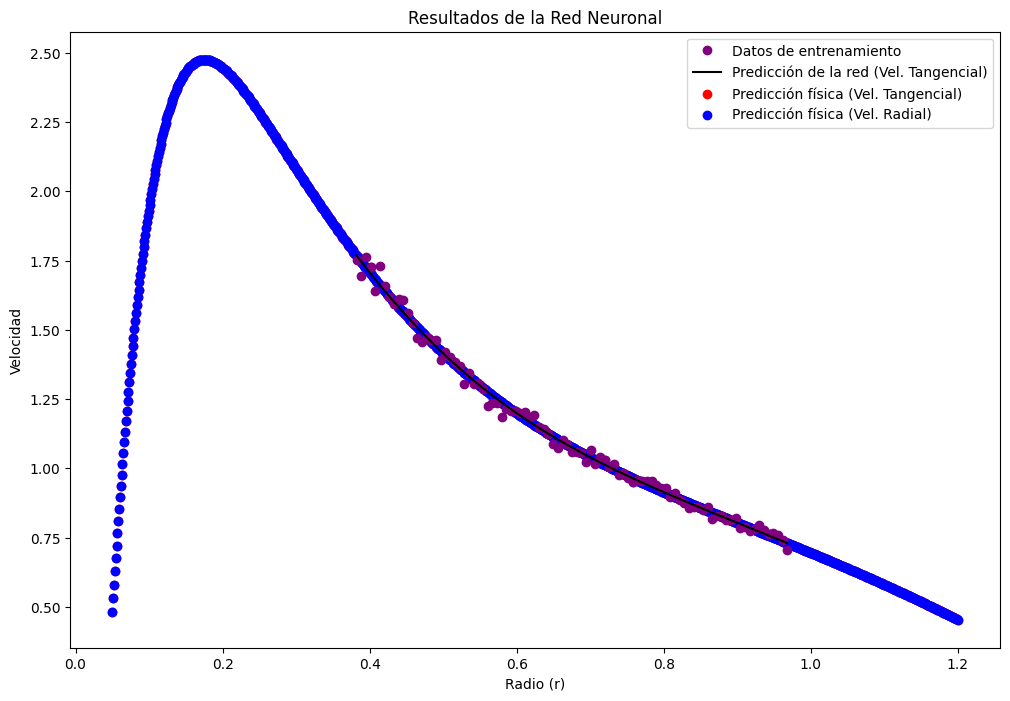

In [ ]:
# Entrenamiento del modelo
iterations = 2000
lambda_phy = 0.001  # Parámetro para la física
lambda_cc = 1       # Parámetro para la condición de contorno, ajustable

# Definir el radio en el que se quiere la condición de contorno
r_contorno1 = torch.tensor([1.5], requires_grad=True).float().to(radios_t.device)
r_contorno2 = torch.tensor([0.04], requires_grad=True).float().to(radios_t.device)

# Entrenamiento de la red
for epoch in range(iterations):
    optimizer.zero_grad()

    # Predicciones para las velocidades tangenciales
    yh = mlp(radios_t)

    # Pérdida basada en los datos
    loss_data = torch.mean((yh - vt_t) ** 2)

    # ========================= Fisica =========================
    # Predicción de la velocidad radial
    u_radial = mlp(radios_physics_t)  # Predicción de la velocidad radial usando la misma red

    # Cálculo de la derivada de la velocidad tangencial
    yhp = mlp(radios_physics_t)  # Predicción de la velocidad tangencial

    du_theta = torch.autograd.grad(yhp, radios_physics_t, torch.ones_like(yhp), create_graph=True, retain_graph=True)[0]  # dy/dx
    du2_theta = torch.autograd.grad(du_theta, radios_physics_t, torch.ones_like(yhp), create_graph=True, retain_graph=True)[0]  # d^2y/dx^2

    # Ecuación diferencial con la velocidad radial
    physics = (mlp.nu * du2_theta + (mlp.nu / radios_physics_t - u_radial) * du_theta
               - (u_radial / radios_physics_t + mlp.nu / radios_physics_t**2) * yhp)  # Igualar a cero
    loss_phy = lambda_phy * torch.mean(physics ** 2)  # Pérdida de física

    # ===================== Condición de contorno =====================
    # Predicción en el radio de contorno (r = 1.4)
    vel_contorno1 = mlp(r_contorno1)
    vel_contorno2 = mlp(r_contorno2)

    # Penalizar si la velocidad en el contorno no es cero
    loss_cc1 = lambda_cc * torch.mean(vel_contorno1 ** 2)
    loss_cc2 = lambda_cc * torch.mean(vel_contorno2 ** 2)

    # Pérdida total
    loss_cc = loss_cc1 + loss_cc2

    # ===================== Pérdida total =====================
    loss = loss_data + loss_phy + loss_cc
    loss.backward()
    optimizer.step()

    # Imprimir información de progreso
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss data: {loss_data.item():.5f}, Loss phy: {loss_phy.item():.5f}, Loss cc: {loss_cc.item():.5f}, Total loss: {loss.item():.5f}")

# Imprimir los parámetros estimados al final del entrenamiento
with torch.no_grad():
    print(f"Valor estimado de nu: {mlp.nu.item()}")

# Visualizar los resultados
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(RADIOS, vt, 'o', label='Datos de entrenamiento', color='purple')
    plt.plot(RADIOS, yh.numpy(), 'k-', label='Predicción de la red (Vel. Tangencial)')
    plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física (Vel. Tangencial)')
    plt.scatter(radios_physics, u_radial.numpy(), color='blue', label='Predicción física (Vel. Radial)')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad')
    plt.title('Resultados de la Red Neuronal')
    plt.show()


In [ ]:
with torch.no_grad():
    plt.figure(figsize=(12, 8))
    plt.plot(RADIOS, vt, 'o', label='Datos de entrenamiento', color='purple')
    plt.plot(RADIOS, yh.numpy(), 'k-', label='Predicción de la red (Vel. Tangencial)')
    plt.scatter(radios_physics, yhp.numpy(), color='red', label='Predicción física (Vel. Tangencial)')
    plt.scatter(radios_physics, u_radial.numpy(), color='blue', label='Predicción física (Vel. Radial)')
    plt.legend()
    plt.xlabel('Radio (r)')
    plt.ylabel('Velocidad')
    plt.title('Resultados de la Red Neuronal')
    plt.show()